# Explore here 

Despues de una anlisis inicial hemos determinad que la variable objetivo para nosotros sera la de precio, ya que Inicialmente se buscaba hacer un analisis para determinar como ser un host exitoso en airbn lo cual implicaba crear una variable de profit que tambien utilizaba precio como variable predictora, pero viendo el set a mayor detalle, no tenemos forma de obtener la cantidad de noches que fue bookeado el aibnb, por lo que buscaremos predecir el precio de un aibnb de acuerdo a las diferentes variables que se nos presentan. 

In [1]:
# Your code herepip3 install pandas
import pandas as pd
import numpy as np
total_data = pd.read_csv("/workspaces/EDA-first/data/raw/NYCD.csv")
total_data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [2]:
print(f'Tenemos Filas y columnas respectivamente \n {total_data.shape} ')

Tenemos Filas y columnas respectivamente 
 (48895, 16) 


In [3]:
#Ahora obtenemos la informacion de panorama del data set, principalmente para variables categoricas
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
#Ahora tenemos que ver las metricas estadisticas de las variables numericas (continuas)
total_data.select_dtypes(include=[int, float]).describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#Drop duplicates, if there are any

dup_1 = total_data.drop('host_id', axis=1).duplicated().sum()
dup_2 =total_data.drop('id', axis=1).duplicated().sum()

print(dup_1, dup_2)

0 0


In [6]:
#Drop irrelevant iformation 

total_data.drop(['name', 'id', 'host_name', 'last_review'], axis=1, inplace=True)


total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
!pip install scipy

In [8]:
#Whereas at first i thought that availability_365 could be the number of nights that the airbnb 
#was not booked therefore, the difference between 365 and availability_365 could be the number of nights booked
#per year, the fact that 
import scipy
print(scipy.__version__)

cero_bookings = total_data['availability_365'].value_counts()[365]
not_booked= (cero_bookings / len(total_data)) *100
print(not_booked)
cero_bookings_1 = total_data['availability_365'].value_counts()[0]
not_booked_1= (cero_bookings_1 / len(total_data)) *100
print(not_booked_1)
print("This 2 % numbers mean thath we have 2 %  listings that were not booked all year and 35.9% that where booked all year ")
print('We are gonna check correlation between availability and number of reviews, to see if a lesser number of availability means a bigger number of reviews')

correlation_1 = total_data['availability_365'].corr(total_data['number_of_reviews'], method='pearson')
print(f"Correlation between availability_365 and number_of_reviews: {correlation_1}")
correlation_2 = total_data['availability_365'].corr(total_data['number_of_reviews'], method='kendall')
print(f"Correlation between availability_365 and number_of_reviews: {correlation_2}")
correlation_3 = total_data['availability_365'].corr(total_data['number_of_reviews'], method='spearman')
print(f"Correlation between availability_365 and number_of_reviews: {correlation_3}")
#And for the reviews per month
correlation_1_2 = total_data['availability_365'].corr(total_data['reviews_per_month'], method='pearson')
print(f"Correlation between availability_365 and reviews_per_month: {correlation_1_2}")
correlation_2_2 = total_data['availability_365'].corr(total_data['reviews_per_month'], method='kendall')
print(f"Correlation between availability_365 and reviews_per_month: {correlation_2_2}")
correlation_3_2 = total_data['availability_365'].corr(total_data['reviews_per_month'], method='spearman')
print(f"Correlation between availability_365 and reviews_per_month: {correlation_3_2}")

1.13.1
2.6485325697924123
35.858472236424994
This 2 % numbers mean thath we have 2 %  listings that were not booked all year and 35.9% that where booked all year 
We are gonna check correlation between availability and number of reviews, to see if a lesser number of availability means a bigger number of reviews
Correlation between availability_365 and number_of_reviews: 0.1720275814629295


Correlation between availability_365 and number_of_reviews: 0.1749634691149716
Correlation between availability_365 and number_of_reviews: 0.23666364856002467
Correlation between availability_365 and reviews_per_month: 0.18579096063066805
Correlation between availability_365 and reviews_per_month: 0.27279869199958334
Correlation between availability_365 and reviews_per_month: 0.3921264680375589


In [9]:
total_data.info()
total_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Ahora se hara un analisis de variables categoricas, donde tendremos que presentar histogramas para explorar los valores que toma cada una y empezar a entender como se relacionan. 

In [10]:
!pip install matplotlib
!pip install seaborn

In [11]:
total_data.calculated_host_listings_count.min()
total_data.calculated_host_listings_count.max()

327

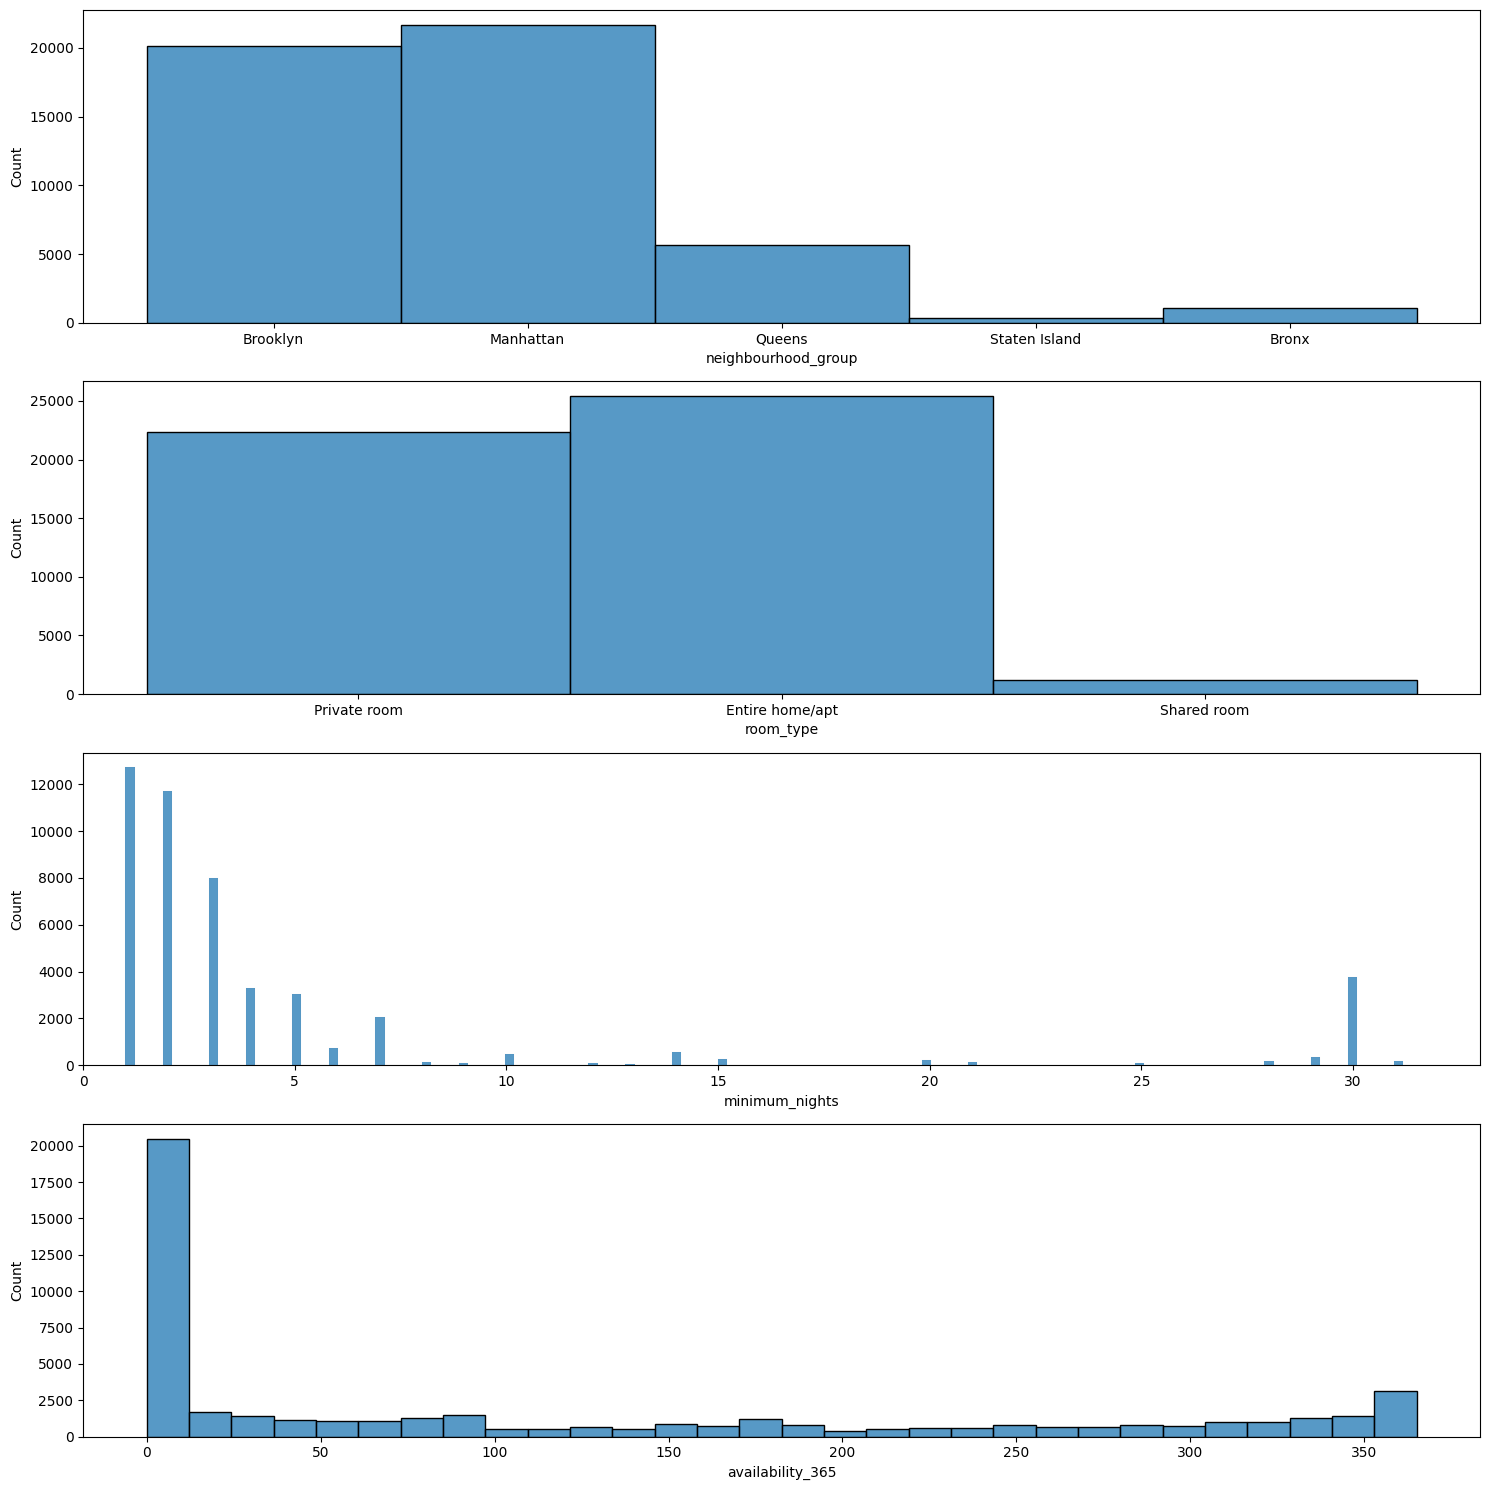

In [12]:
''' 
Tendremos como variables categoricas:
neighbourhood_group
neighbourhood
room_type
calculated_host_listings_count
minimum_nights
'''
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4,1, figsize= (15,15))

sns.histplot(ax= axis[0], data = total_data, x = 'neighbourhood_group')
sns.histplot(ax= axis[1], data = total_data, x = 'room_type')
sns.histplot(ax=axis[2], data = total_data, x = 'minimum_nights').set_xlim(0,33)
sns.histplot(ax=axis[3], data = total_data, x = 'availability_365')


plt.tight_layout()
plt.show()


Aqui podemos observar en el primer histograma que aproximadamente 20,000 listings estan en manhattan y brookly, siendo aproximadamente el 80% del total en estas dos zonas.
Tendremos un valor similar para los listings de cuarto privado y departamento entero. 
Con ello tendremos conclusiones iniciales como:
Aproximadamente el 80% de los listings son en manhattan y brooklyn
Aproximadamente el 80% de los listings sin de un cuarto privado o departamento entero
Queens es la tercer zona con mayor concurrencia, llegando aproximadamente a 5 mil y el resto se divide en el bronx y staten island. 
El numero de listings que presenta cuartos compartidos es casi nulo en comparacion con el dataset.


In [13]:
total_data.neighbourhood.value_counts()
print(f'Tendemos un total de {len(total_data.neighbourhood.value_counts())} vecindarios')
man_neig = total_data.loc[total_data['neighbourhood_group'] == 'Manhattan', 'neighbourhood'].value_counts()
print(f'De los cuales {len(man_neig)} pertenecen a manhattan')
broo_neig = total_data.loc[total_data['neighbourhood_group'] == 'Brooklyn', 'neighbourhood'].value_counts()
print(f'{len(broo_neig)} pertenecen a Brooklyn')
queens_neig = total_data.loc[total_data['neighbourhood_group'] == 'Queens', 'neighbourhood'].value_counts()
print(f'{len(queens_neig)} pertenecen a Queens')
bronx_neig = total_data.loc[total_data['neighbourhood_group'] == 'Bronx', 'neighbourhood'].value_counts()
print(f'{len(bronx_neig)} pertenecen a Bronx')
stat_neig = total_data.loc[total_data['neighbourhood_group'] == 'Staten Island', 'neighbourhood'].value_counts()
print(f'{len(stat_neig)} pertenecen a Staten Island')

Tendemos un total de 221 vecindarios
De los cuales 32 pertenecen a manhattan
47 pertenecen a Brooklyn
51 pertenecen a Queens
48 pertenecen a Bronx
43 pertenecen a Staten Island


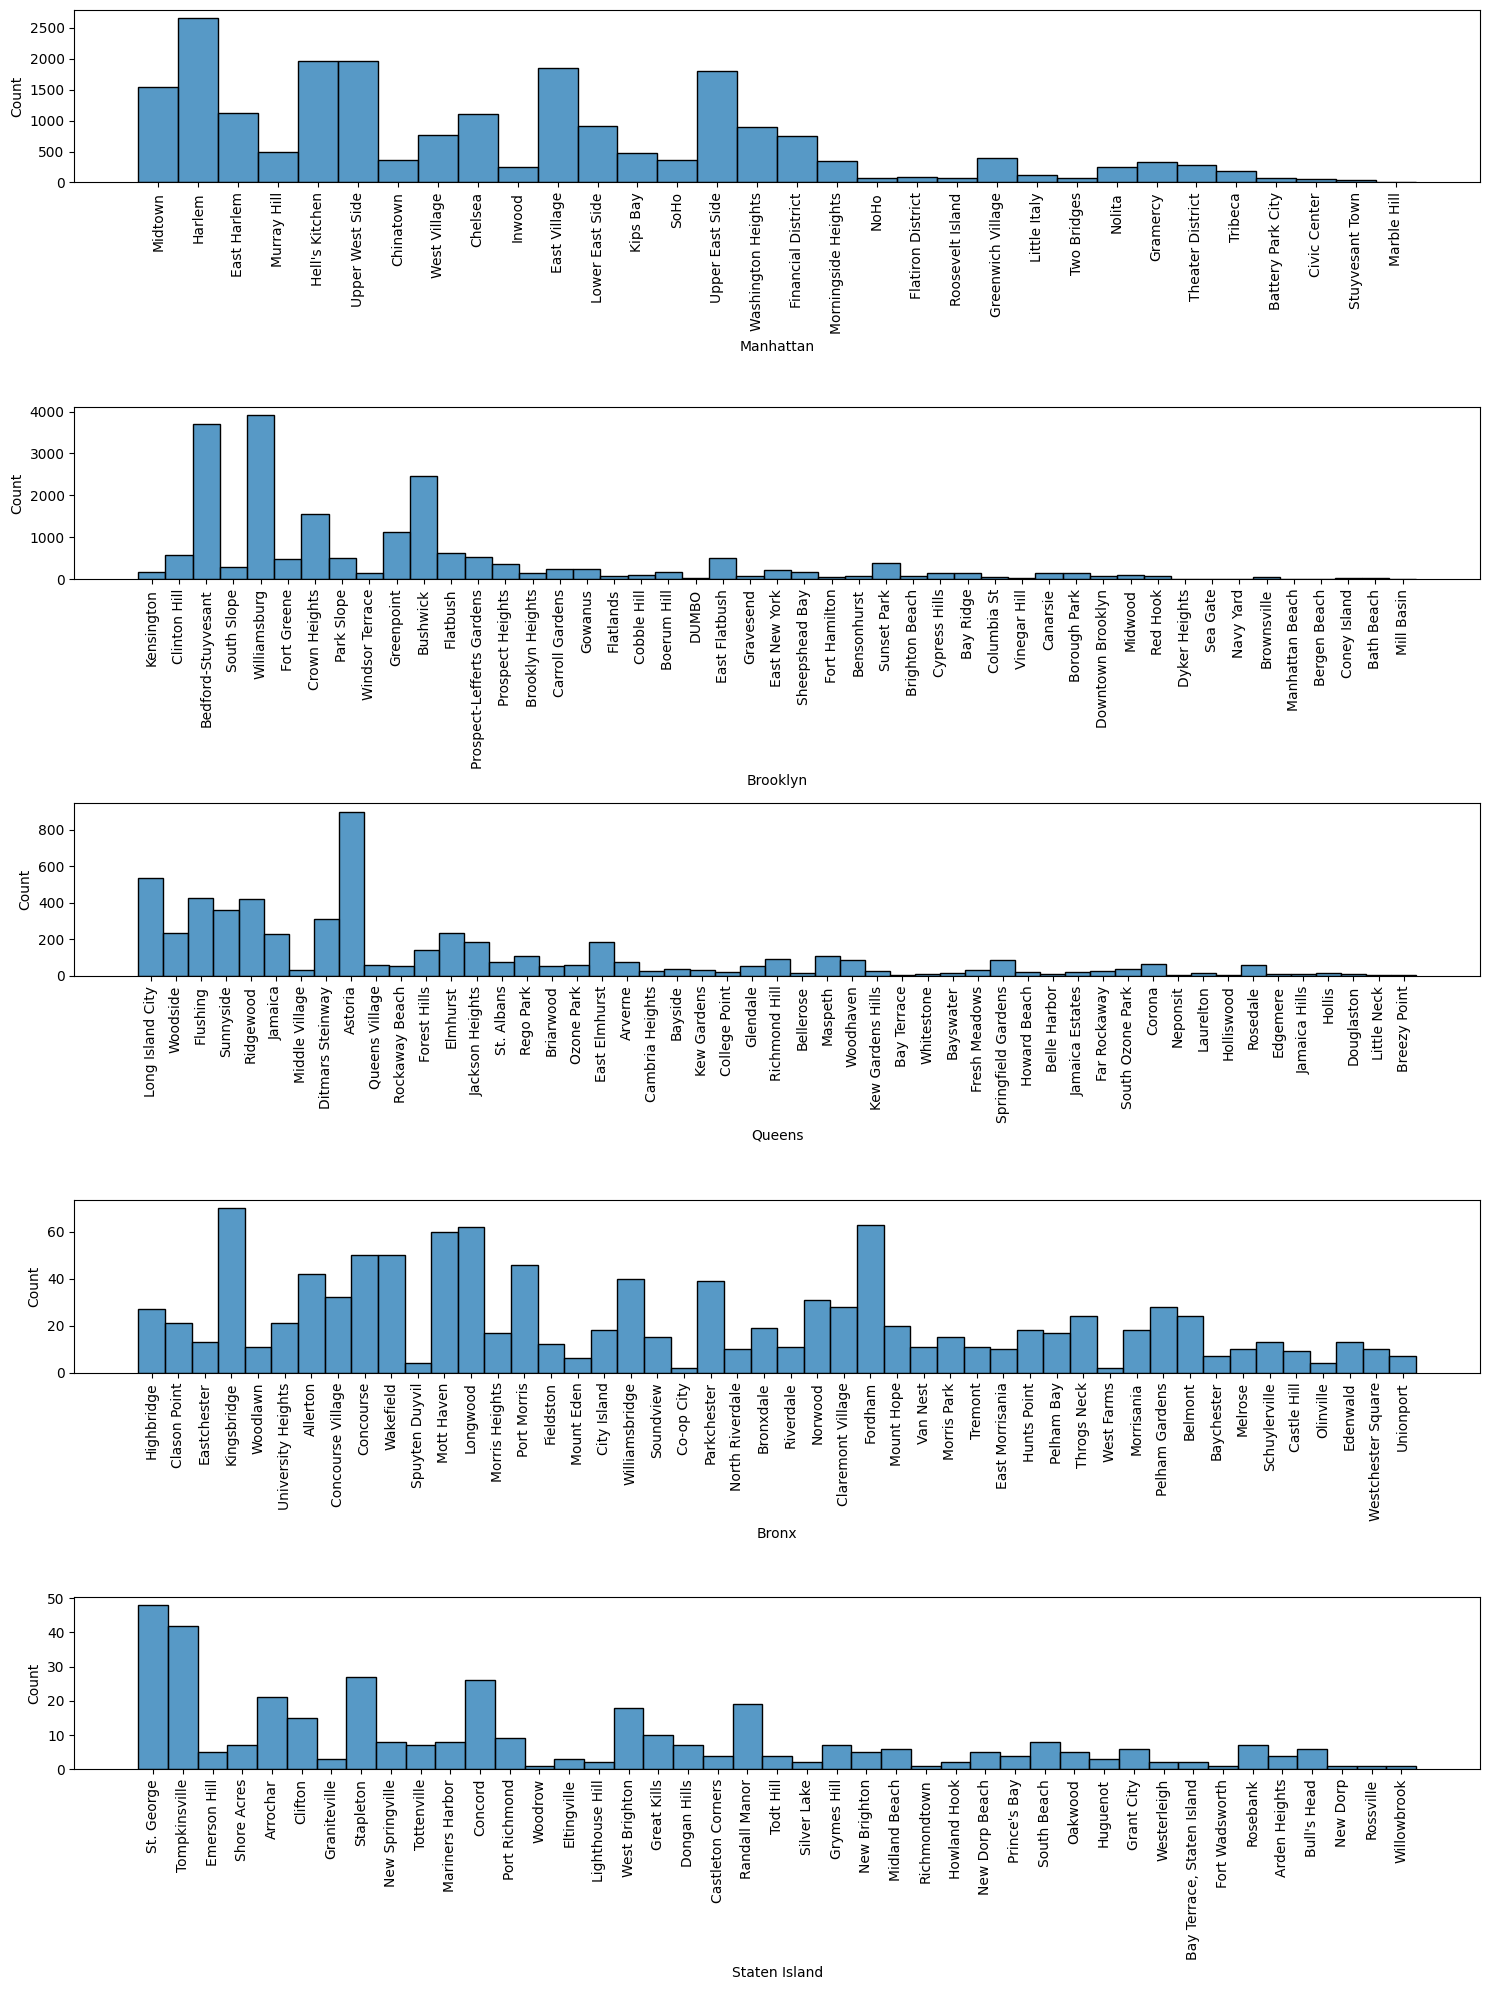

In [14]:
fig, axis = plt.subplots(5,1, figsize= (15,20))

sns.histplot(ax= axis[0], data = total_data, x = total_data.loc[total_data['neighbourhood_group'] == 'Manhattan', 'neighbourhood']).set(xlabel= 'Manhattan')
sns.histplot(ax= axis[1], data = total_data, x = total_data.loc[total_data['neighbourhood_group'] == 'Brooklyn', 'neighbourhood']).set(xlabel= 'Brooklyn')
sns.histplot(ax= axis[2], data = total_data, x = total_data.loc[total_data['neighbourhood_group'] == 'Queens', 'neighbourhood']).set(xlabel= 'Queens')
sns.histplot(ax= axis[3], data = total_data, x = total_data.loc[total_data['neighbourhood_group'] == 'Bronx', 'neighbourhood']).set(xlabel= 'Bronx')
sns.histplot(ax= axis[4], data = total_data, x = total_data.loc[total_data['neighbourhood_group'] == 'Staten Island', 'neighbourhood']).set(xlabel= 'Staten Island')

for ax in axis.flat:
    # Rotate x-axis labels vertically
    ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

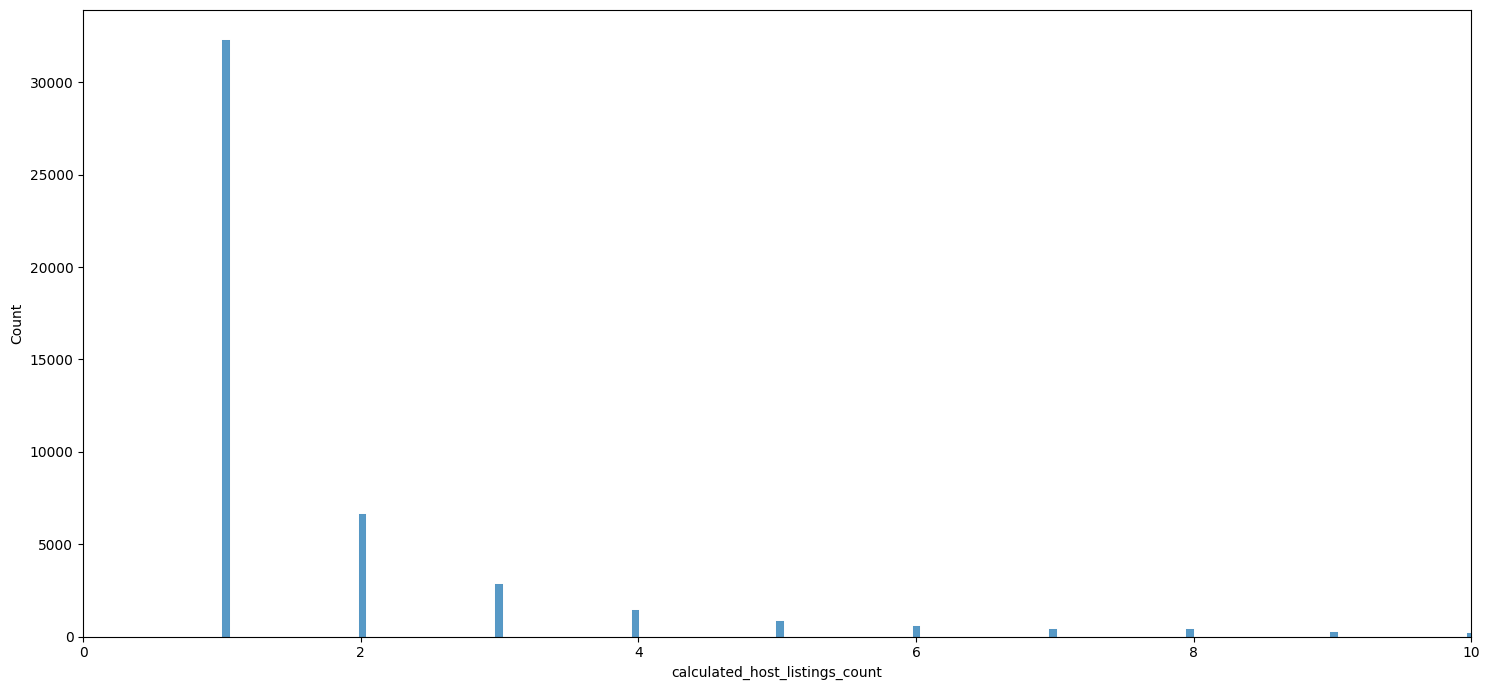

In [15]:
fig, axis = plt.subplots(1,1, figsize= (15,7))
sns.histplot(data = total_data, x = 'calculated_host_listings_count', ax=axis).set_xlim(0,10)
plt.tight_layout()
plt.show()

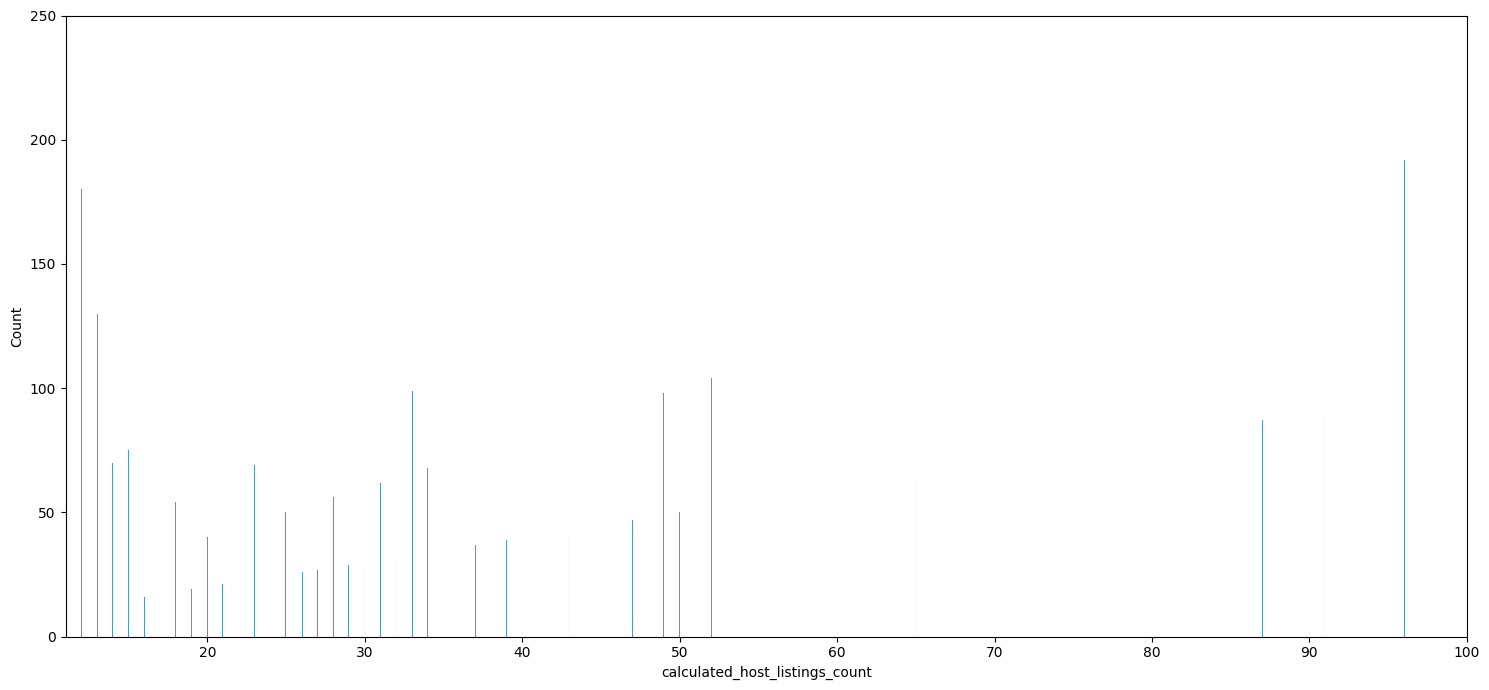

In [16]:
fig, axis = plt.subplots(1,1, figsize= (15,7))
sns.histplot(data = total_data, x = 'calculated_host_listings_count', ax=axis).set_xlim(11,100)
plt.ylim(0,250)
plt.tight_layout()
plt.show()

Escribir Analisis pendiente

Ahora seguimos con las variables numericas

In [17]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

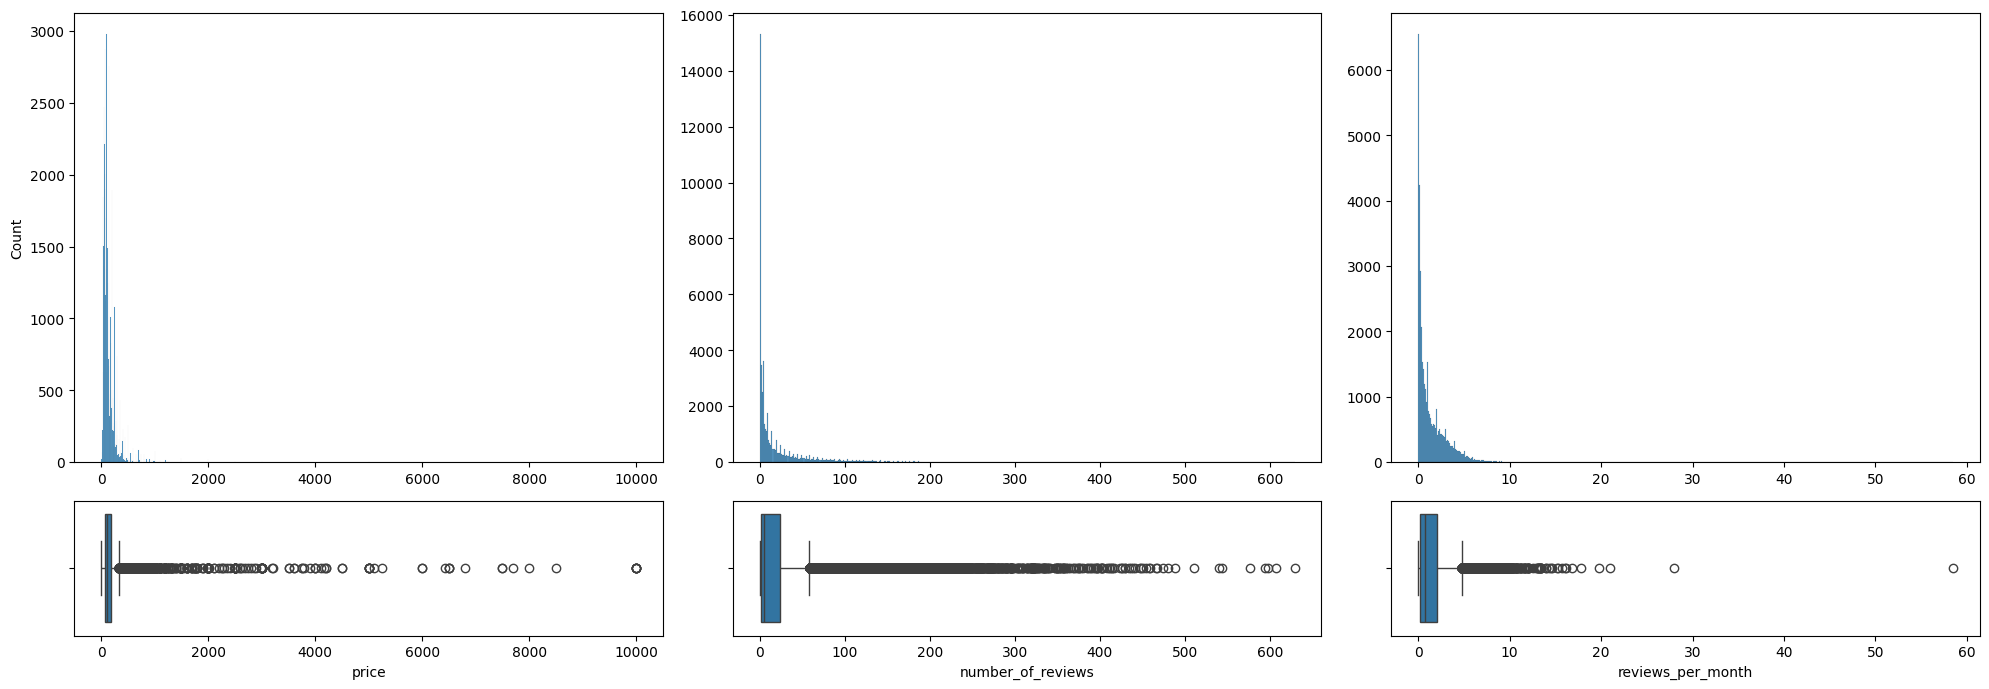

In [18]:
#Las variables numericas de interes son 
'''  
price
number_of_reviews
reviews_per_month
availability_365
minimum_nights
longitude
latitude                                                                                 
'''
fig, axis = plt.subplots(2, 3, figsize = (20, 7), gridspec_kw={'height_ratios': [10, 3]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "number_of_reviews")
sns.histplot(ax = axis[0, 2], data = total_data, x = "reviews_per_month").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "reviews_per_month")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
max_price = total_data.price.max()
max_rev = total_data.number_of_reviews.max()
max_rpm= total_data.reviews_per_month.max()

print(max_rev, max_price, max_rpm)

price_mode = total_data.price.value_counts()[100]
rev_mode = total_data.number_of_reviews.value_counts()[0]
rpm_mode = total_data.reviews_per_month.value_counts()[.02]

print(price_mode, rev_mode, rpm_mode)


629 10000 58.5
2051 10052 919


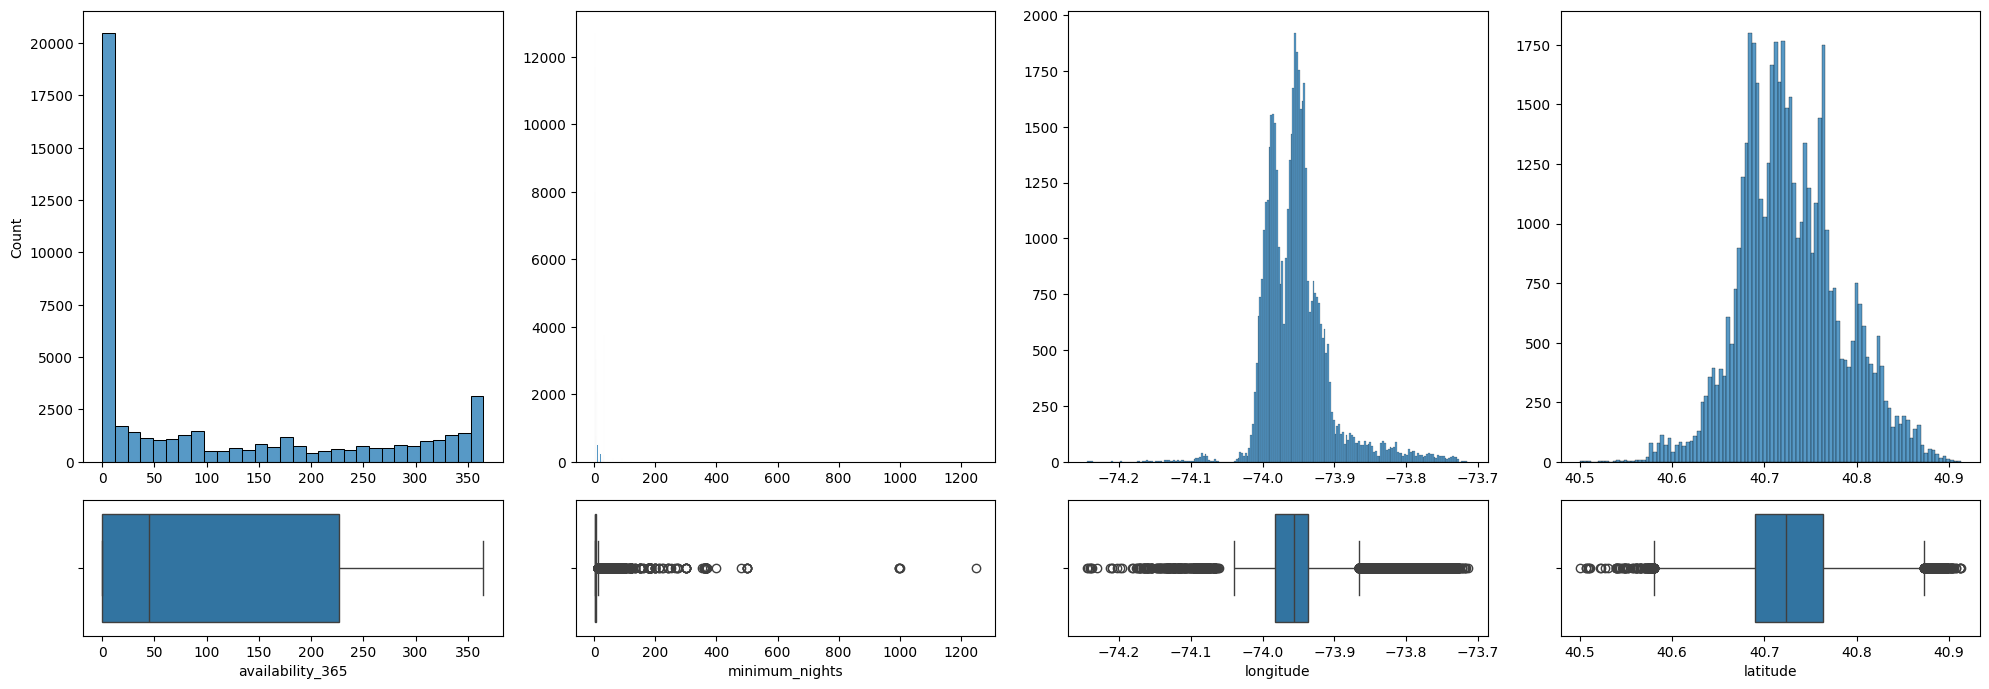

In [20]:
#Las variables numericas de interes son 
'''  
availability_365
minimum_nights
longitude
latitude                                                                                 
'''

fig, axis = plt.subplots(2, 4, figsize = (20, 7), gridspec_kw={'height_ratios': [10, 3]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "availability_365").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "availability_365")
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = total_data, x = "longitude").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "longitude")
sns.histplot(ax = axis[0, 3], data = total_data, x = "latitude").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_data, x = "latitude")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

ANALISIS MULTIVARIABLE

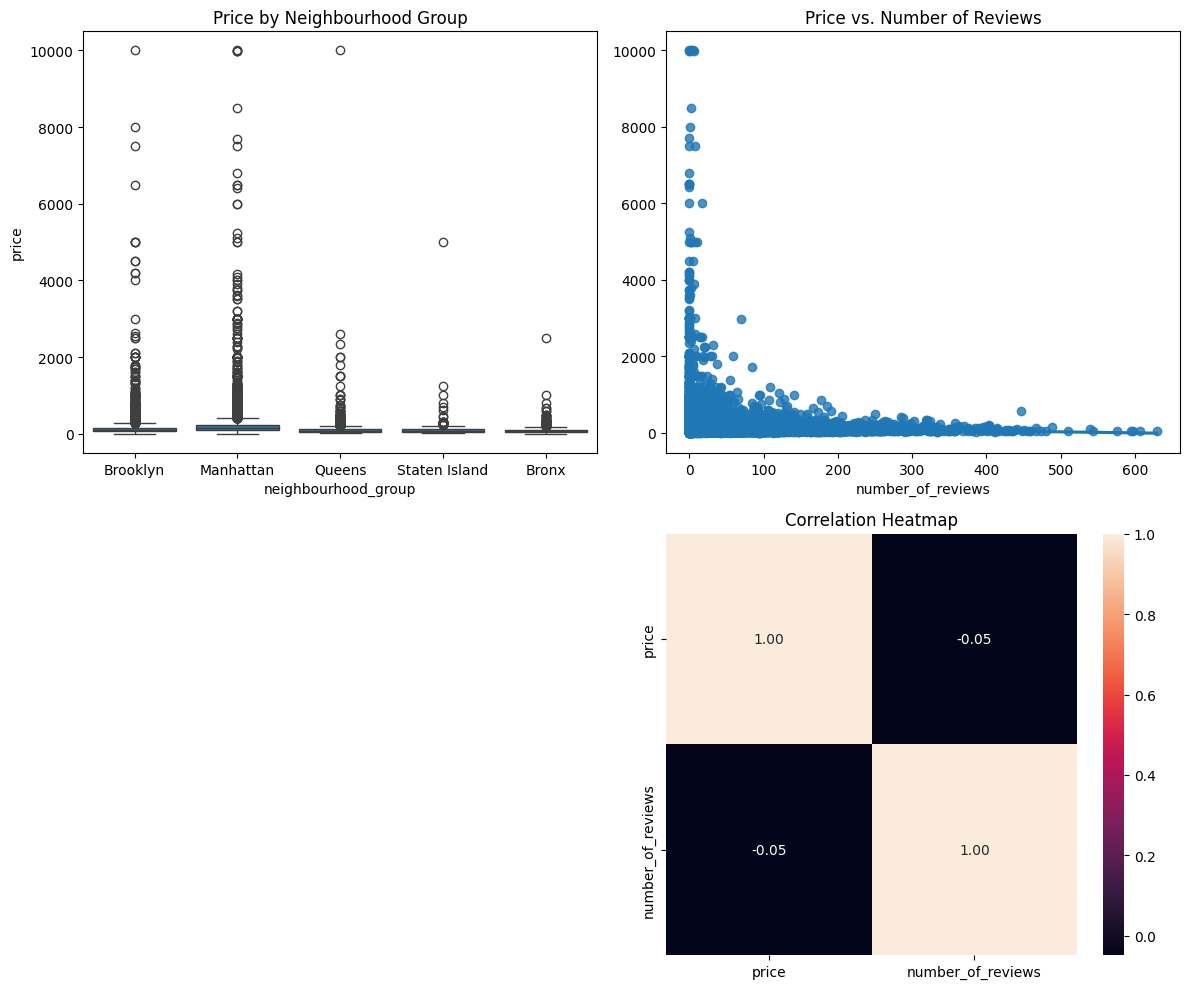

In [21]:
#Vamos a empezar con precio - zona de vecindarios y precio number of reviews
#neighbourhood_group  , number_of_reviews                          
total_data['neighbourhood_group_numeric'] = total_data['neighbourhood_group'].astype('category').cat.codes

fig, axis = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(ax=axis[0, 0], data=total_data, x="neighbourhood_group", y="price")
axis[0, 0].set_title('Price by Neighbourhood Group')
axis[1, 0].axis('off')
sns.regplot(ax=axis[0, 1], data=total_data, x="number_of_reviews", y="price").set(ylabel=None)
axis[0, 1].set_title('Price vs. Number of Reviews')
sns.heatmap(total_data[['price', 'number_of_reviews']].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
axis[1, 1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

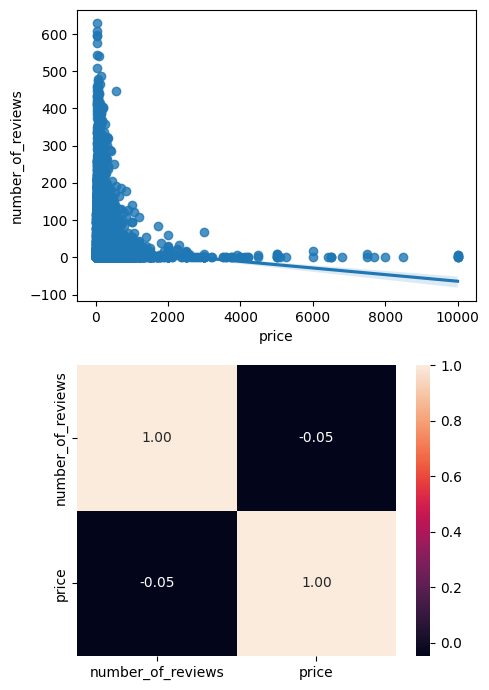

In [22]:
#number_of_reviews vs price               
fig, axis = plt.subplots(2, 1, figsize = (5, 7))
sns.regplot(ax = axis[0], data = total_data, x = "price", y = "number_of_reviews")
sns.heatmap(total_data[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1])


plt.tight_layout()
plt.show()

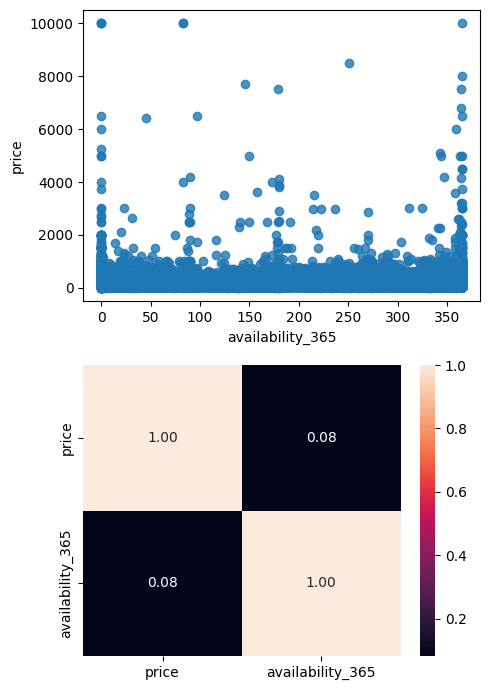

In [23]:
#availability_365 vs price               
fig, axis = plt.subplots(2, 1, figsize = (5, 7))
sns.regplot(ax = axis[0], data = total_data, x = "availability_365", y = "price")
sns.heatmap(total_data[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1])


plt.tight_layout()
plt.show()

In [24]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
 12  neighbourhood_group_numeric     

In [25]:
#creamos la funcion para analizar todos nuestras variables categoricas.
def graficos_eda_categoricos(cat):

  #calculamos el numero de filas que necesitamos
  from math import ceil
  filas = ceil(cat.shape[1] / 2)

  #definimos el grafico
  f, ax = plt.subplots(nrows = filas, ncols= 2, figsize = (16, filas * 6))

  #aplanamos para iterar por el grafico como si fuera de 1 dimension en lugar de 2
  ax = ax.flat

  #creamos el bucle que va aniadiendo graficos
  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.barh(ax = ax[cada])
    ax[cada].set_title(variable, fontsize=12, fontweight= 'bold')
    ax[cada].tick_params(labelsize= 12)

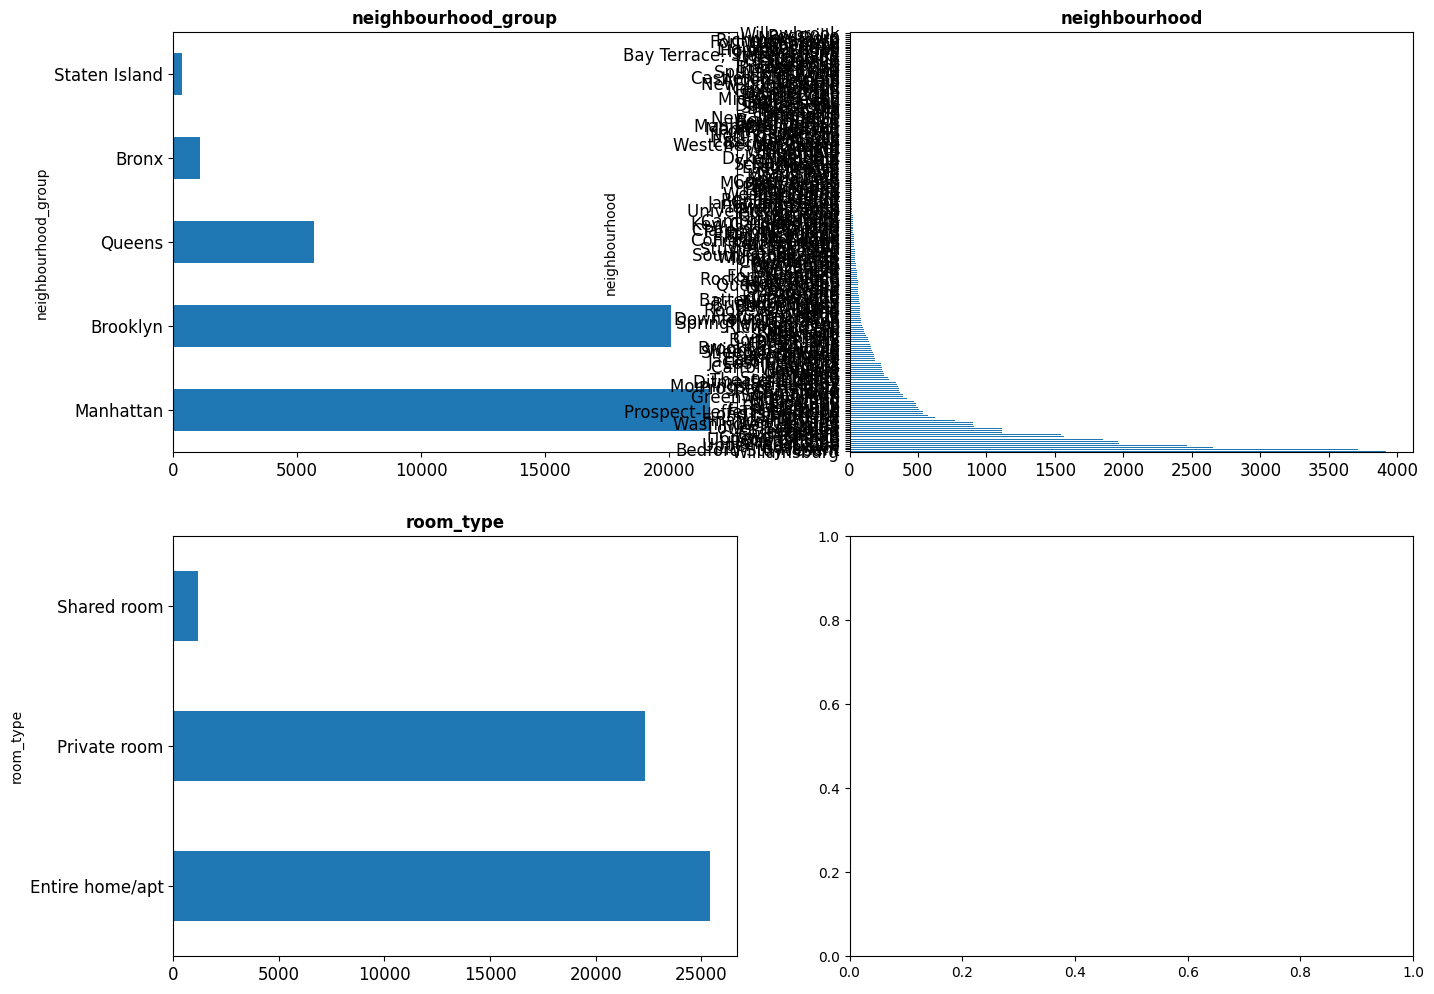

In [26]:
graficos_eda_categoricos(total_data.select_dtypes('O'))

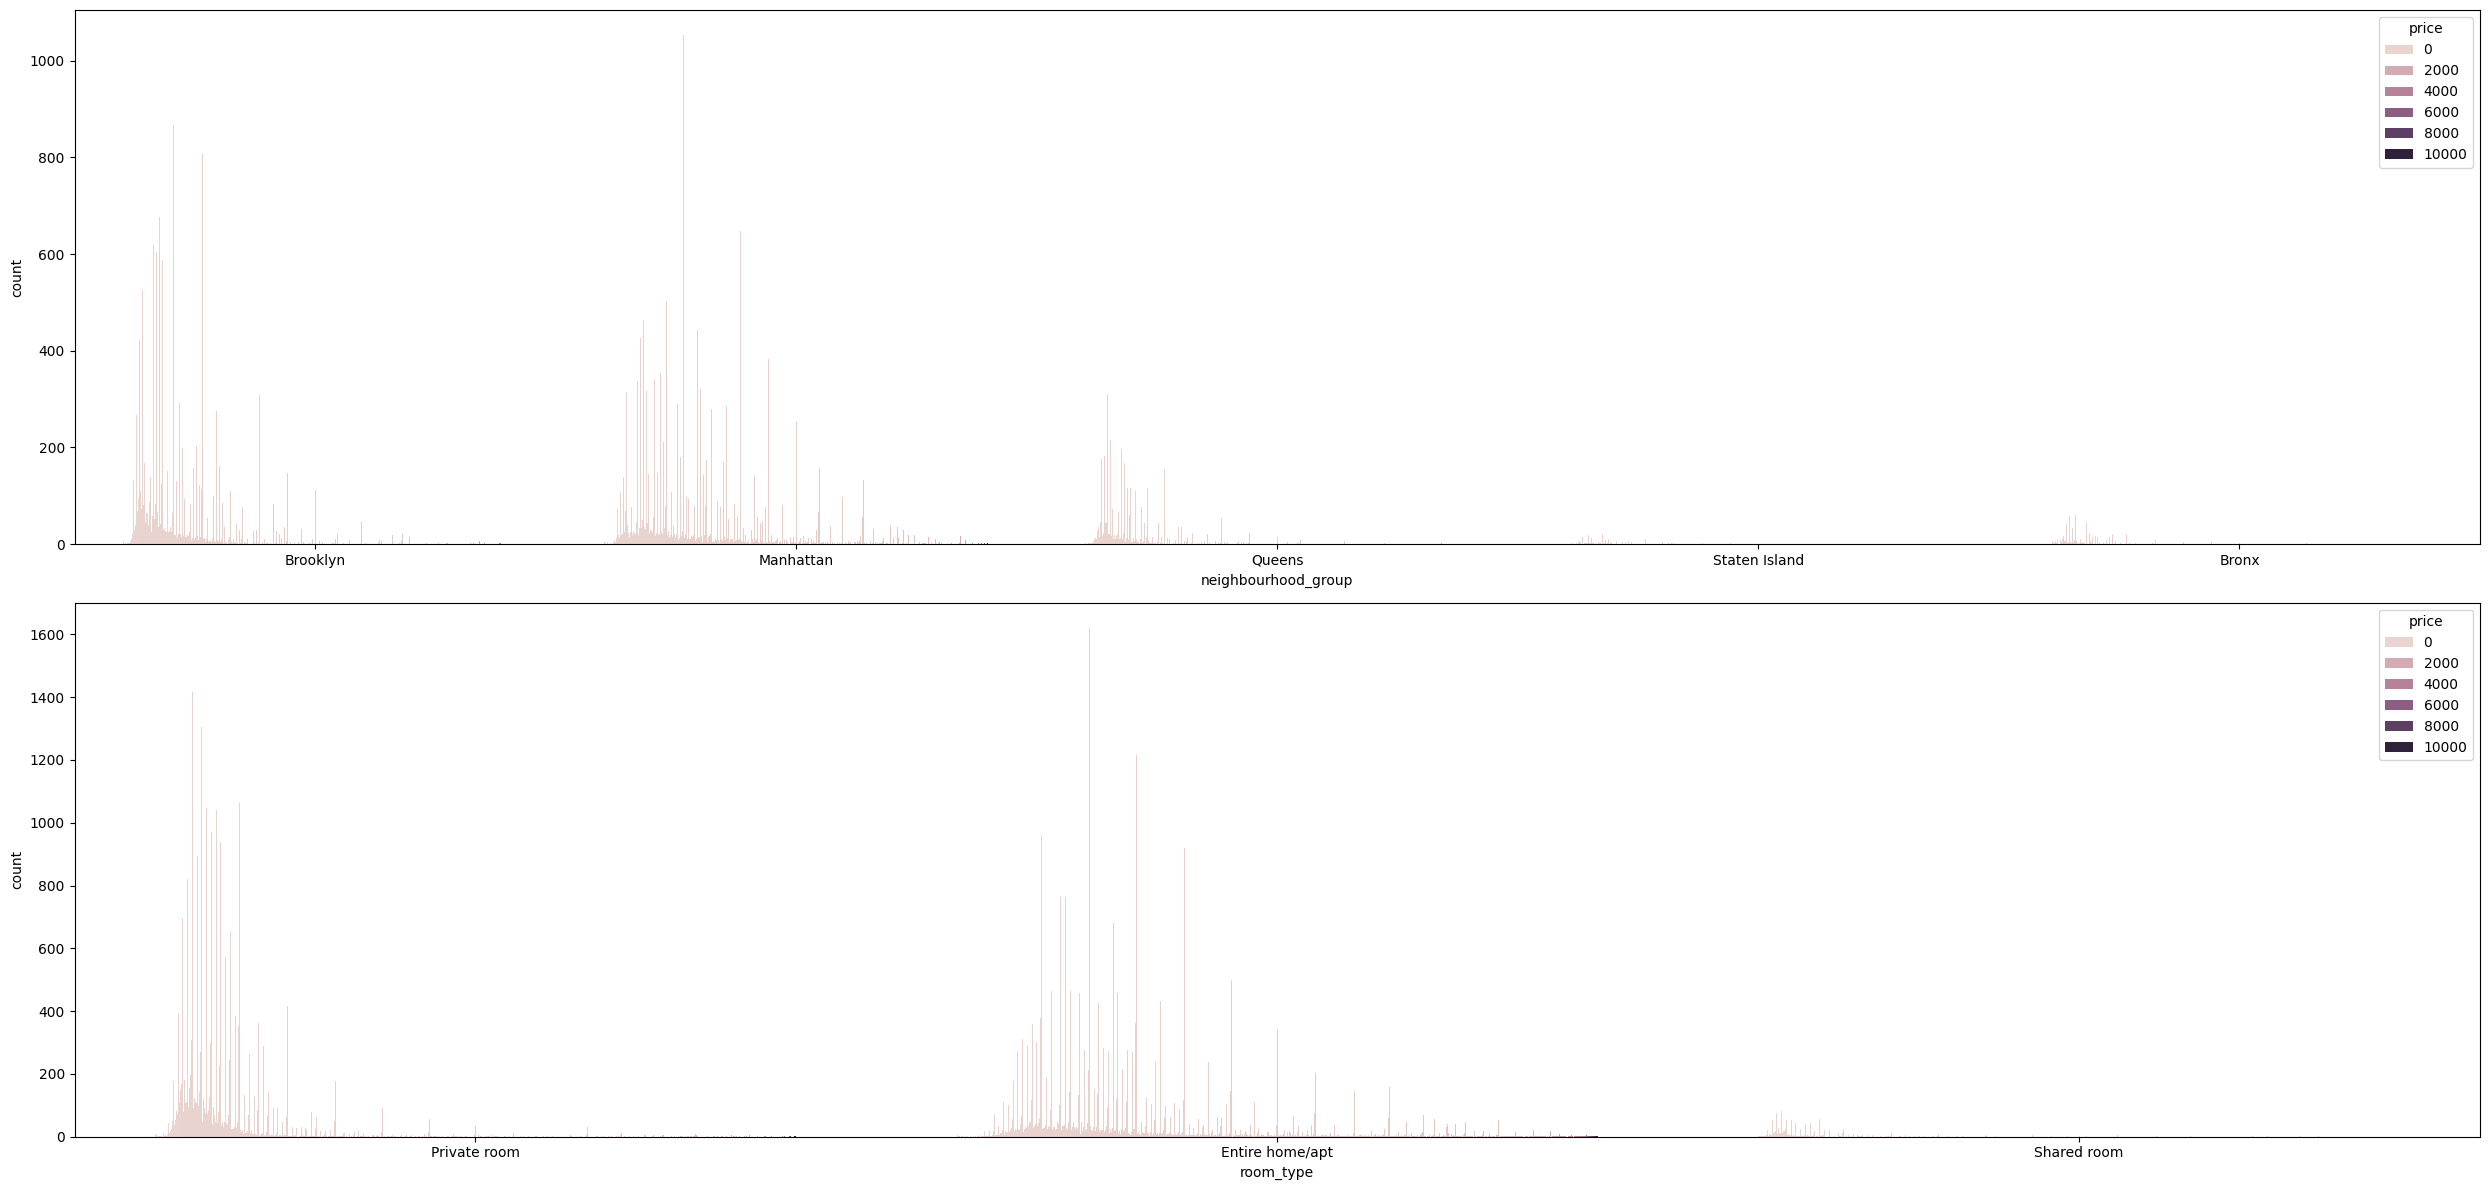

In [27]:
fig, axis = plt.subplots(2, 1, figsize = (25,12))

sns.countplot(ax = axis[0], data = total_data, x = "neighbourhood_group", hue = "price")
#sns.countplot(ax = axis[1], data = total_data, x = "neighbourhood", hue = "price")
sns.countplot(ax = axis[1], data = total_data, x = "room_type", hue = "price")

plt.tight_layout()


plt.show()

In [28]:
total_data.duplicated().sum()
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
 12  neighbourhood_group_numeric     

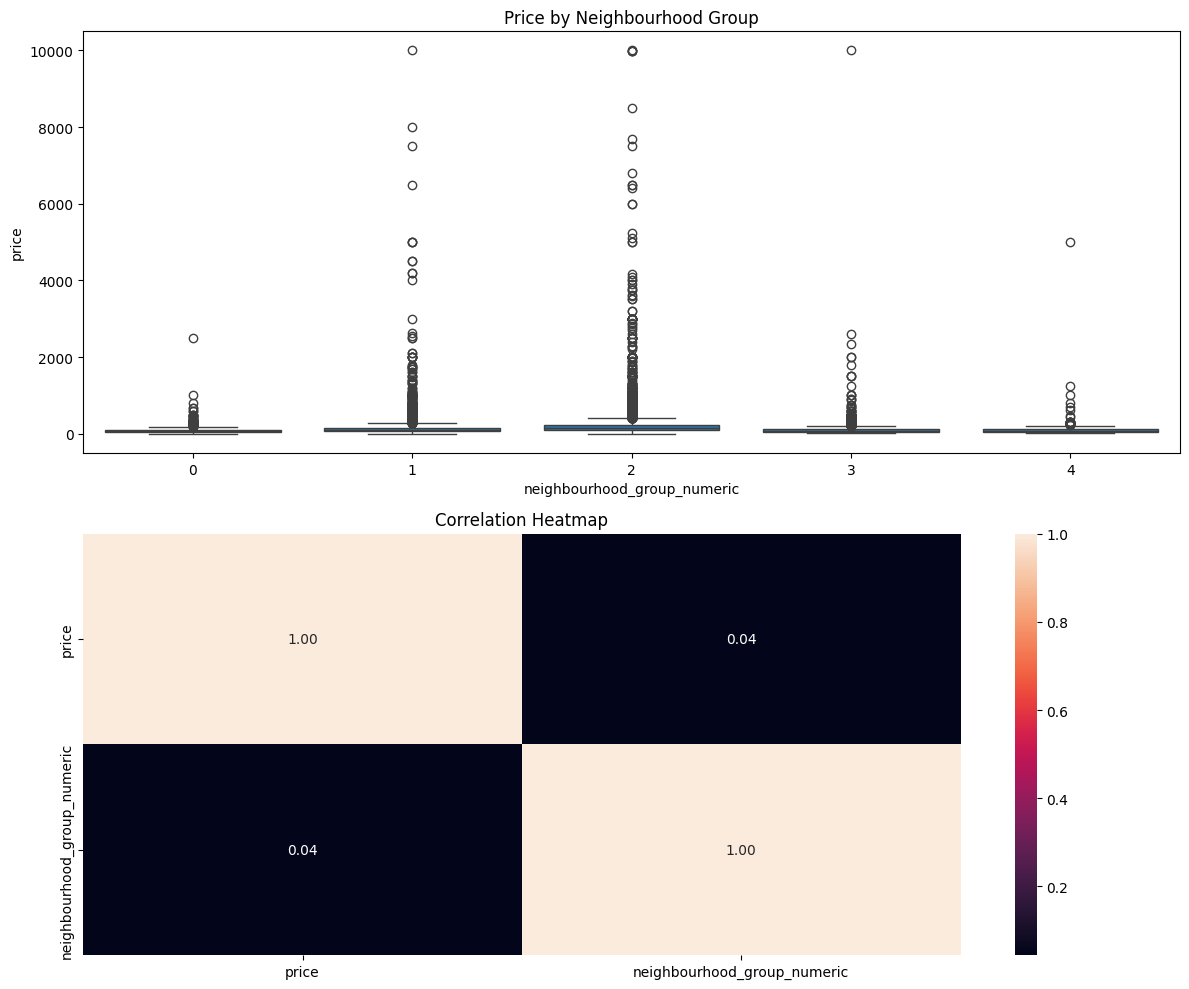

In [29]:
fig, axis = plt.subplots(2, 1, figsize=(12, 10))
sns.boxplot(ax=axis[0], data=total_data, x="neighbourhood_group_numeric", y="price")
sns.heatmap(total_data[['price', 'neighbourhood_group_numeric']].corr(), annot=True, fmt=".2f", ax=axis[1])
axis[0].set_title('Price by Neighbourhood Group')
axis[1].set_title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Tendremos valores numericos asignados a las categorias de grupo de vecindario
Brooklyn = 1
Manhattan = 2
Queens = 3
Staten Island = 4
Bronx = 0


Vamos a agregar valores numericos a todas las variables categoricas

In [30]:
import sklearn
print(sklearn.__version__)


1.5.0


In [31]:

from sklearn.preprocessing import OneHotEncoder

categorical_columns = total_data.select_dtypes(include=['object']).columns


onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = onehot_encoder.fit_transform(total_data[categorical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_columns))
total_data = pd.concat([total_data, encoded_df], axis=1)
total_data = total_data.drop(columns=categorical_columns)

print("Dataset después de agregar columnas codificadas:")
print(total_data.head())


Dataset después de agregar columnas codificadas:
   host_id  latitude  longitude  price  minimum_nights  number_of_reviews  \
0     2787  40.64749  -73.97237    149               1                  9   
1     2845  40.75362  -73.98377    225               1                 45   
2     4632  40.80902  -73.94190    150               3                  0   
3     4869  40.68514  -73.95976     89               1                270   
4     7192  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   neighbourhood_group_numeric  ...  neighb

In [32]:
total_data.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4632,40.80902,-73.94190,150,3,0,NaN,1,365,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


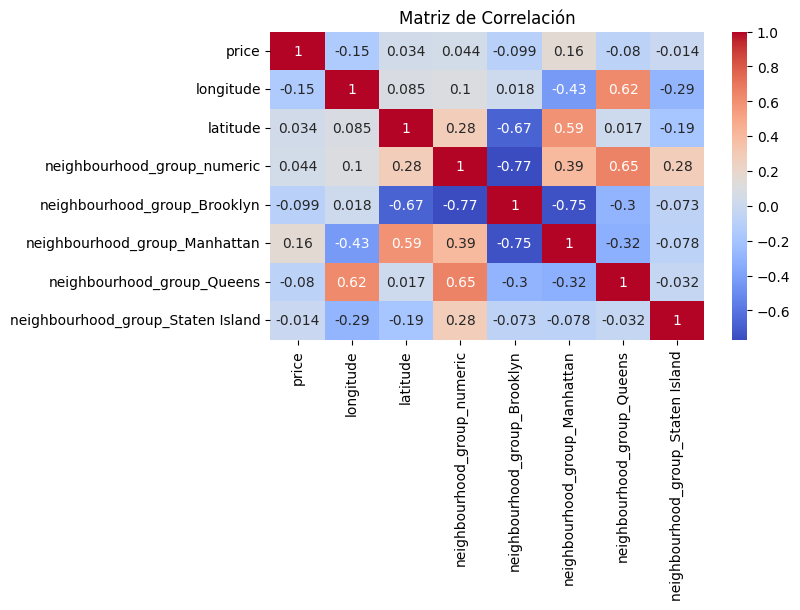

In [33]:
# Filtrar las columnas booleanas (asumiendo que tienen nombres que empiezan con 'neighbourhood_')
boolean_columns = [col for col in total_data.columns if col.startswith('neighbourhood_') and 'group' in col]

# Crear un DataFrame con las variables de interés
analysis_data = total_data[['price', 'longitude', 'latitude'] + boolean_columns]

# Calcular la matriz de correlación
correlation_matrix = analysis_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [34]:
drop_neigh_columns = [col for col in total_data.columns if col.startswith('neighbourhood_') and 'group' not in col and 'room_type' not in col]
total_data.drop(drop_neigh_columns, axis=1, inplace=True)

In [35]:
total_data.columns.tolist()

['host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_numeric',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'room_type_Private room',
 'room_type_Shared room']

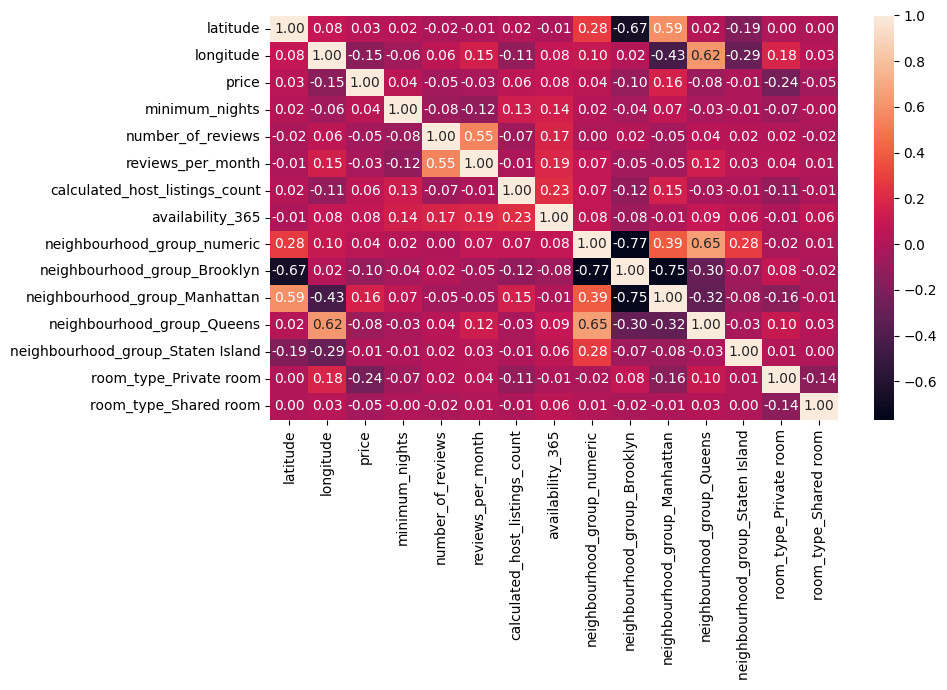

In [36]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[['latitude', 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_numeric',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'room_type_Private room',
 'room_type_Shared room']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [37]:
#sns.pairplot(data = total_data)
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   host_id                            48895 non-null  int64  
 1   latitude                           48895 non-null  float64
 2   longitude                          48895 non-null  float64
 3   price                              48895 non-null  int64  
 4   minimum_nights                     48895 non-null  int64  
 5   number_of_reviews                  48895 non-null  int64  
 6   reviews_per_month                  38843 non-null  float64
 7   calculated_host_listings_count     48895 non-null  int64  
 8   availability_365                   48895 non-null  int64  
 9   neighbourhood_group_numeric        48895 non-null  int8   
 10  neighbourhood_group_Brooklyn       48895 non-null  float64
 11  neighbourhood_group_Manhattan      48895 non-null  flo

In [38]:
total_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,1.675345,0.411167,0.443011,0.115881,0.007629,0.456611,0.023724
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.735816,0.492050,0.496747,0.320085,0.087009,0.498119,0.152190
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
total_data = total_data.drop(columns=['host_id'])

In [40]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           48895 non-null  float64
 1   longitude                          48895 non-null  float64
 2   price                              48895 non-null  int64  
 3   minimum_nights                     48895 non-null  int64  
 4   number_of_reviews                  48895 non-null  int64  
 5   reviews_per_month                  38843 non-null  float64
 6   calculated_host_listings_count     48895 non-null  int64  
 7   availability_365                   48895 non-null  int64  
 8   neighbourhood_group_numeric        48895 non-null  int8   
 9   neighbourhood_group_Brooklyn       48895 non-null  float64
 10  neighbourhood_group_Manhattan      48895 non-null  float64
 11  neighbourhood_group_Queens         48895 non-null  flo

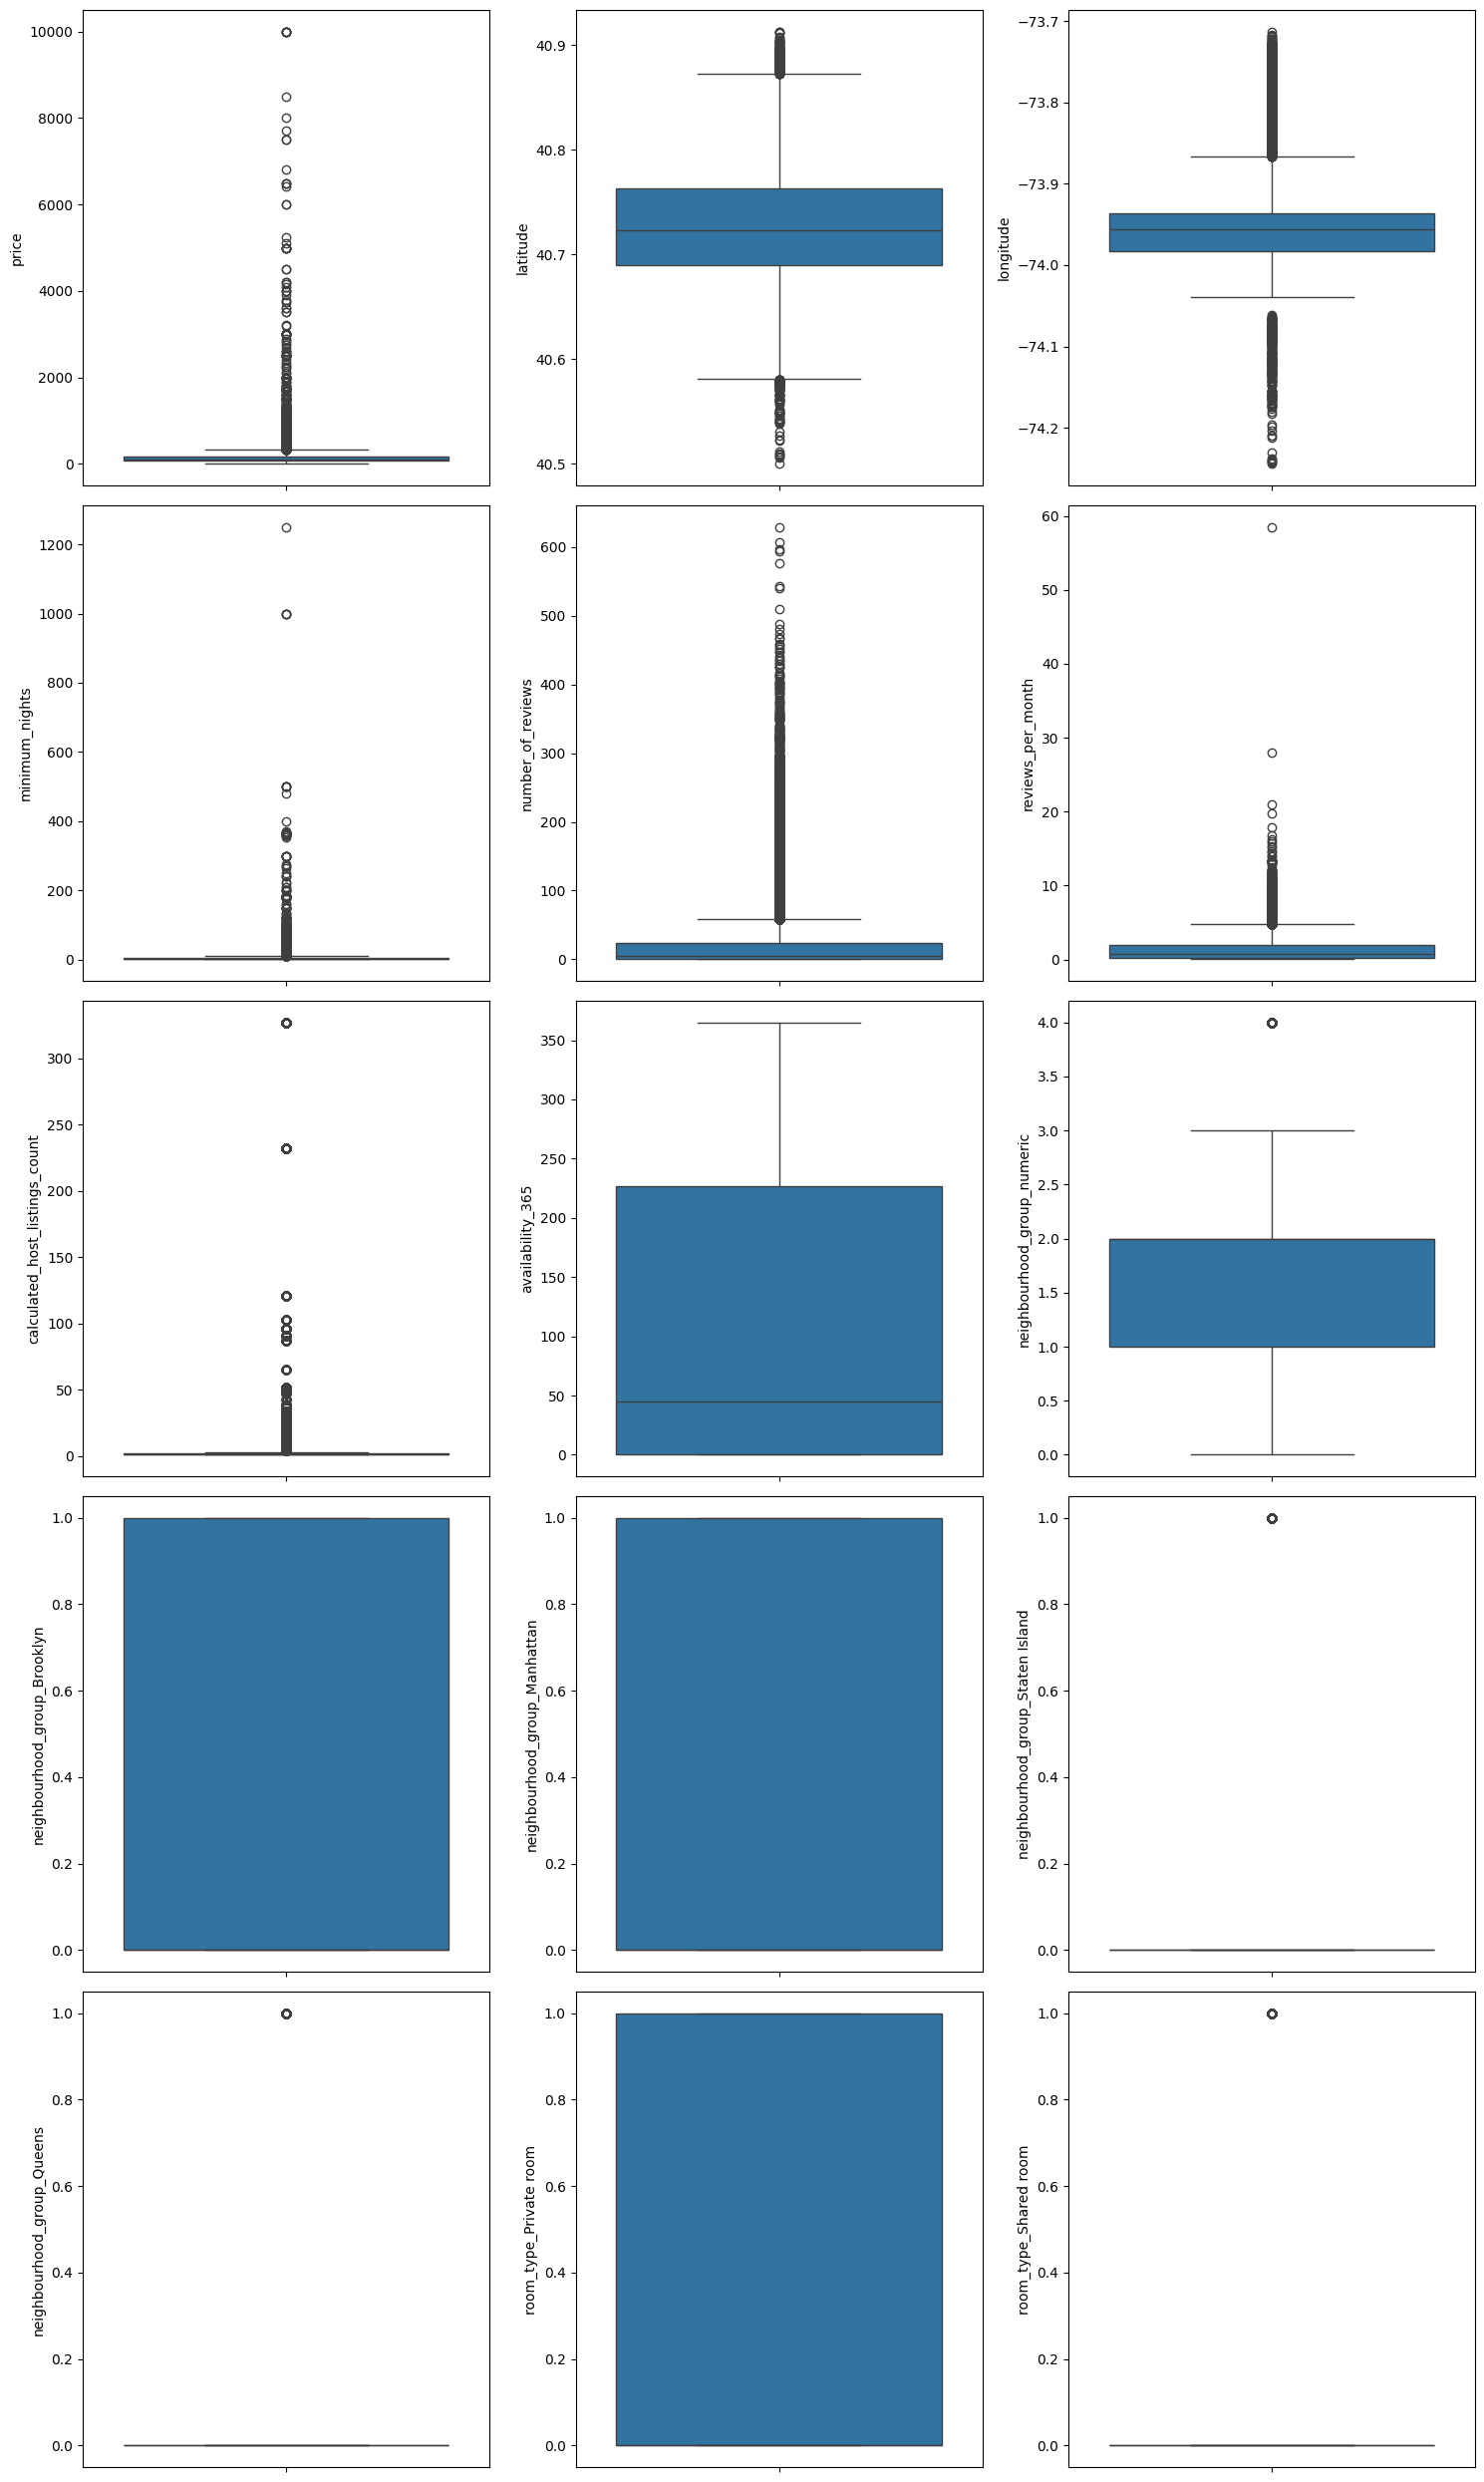

In [41]:
fig, axis = plt.subplots(5, 3, figsize = (15, 25))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "price")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "latitude")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "longitude")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "reviews_per_month")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[2, 2], data = total_data, y = "neighbourhood_group_numeric")
sns.boxplot(ax = axis[3, 0], data = total_data, y = "neighbourhood_group_Brooklyn")
sns.boxplot(ax = axis[3, 1], data = total_data, y = "neighbourhood_group_Manhattan")
sns.boxplot(ax = axis[3, 2], data = total_data, y = "neighbourhood_group_Staten Island")
sns.boxplot(ax = axis[4, 0], data = total_data, y = "neighbourhood_group_Queens")
sns.boxplot(ax = axis[4, 1], data = total_data, y = "room_type_Private room")
sns.boxplot(ax = axis[4, 2], data = total_data, y = "room_type_Shared room")

plt.tight_layout()

plt.show()


In [42]:
mn_desc = total_data.minimum_nights.describe()
mn_iqr = mn_desc["75%"] - mn_desc["25%"]
upper_limit = mn_desc["75%"] + 1.5 * mn_iqr
lower_limit = mn_desc["25%"] - 1.5 * mn_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(mn_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [43]:
total_data[total_data['minimum_nights'] > 90 ]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
61,40.74623,-73.99530,375,180,5,0.12,1,180,2,0.0,1.0,0.0,0.0,0.0,0.0
245,40.75749,-73.96897,110,200,92,0.90,1,140,2,0.0,1.0,0.0,0.0,0.0,0.0
667,40.66230,-73.99049,96,120,13,0.14,1,204,1,1.0,0.0,0.0,0.0,0.0,0.0
700,40.74618,-74.00392,195,365,10,0.12,1,0,2,0.0,1.0,0.0,0.0,0.0,0.0
719,40.72059,-73.95670,185,180,24,0.26,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47620,40.70898,-73.94885,140,500,0,NaN,1,331,1,1.0,0.0,0.0,0.0,0.0,0.0
47745,40.80778,-73.94762,200,120,0,NaN,1,365,2,0.0,1.0,0.0,0.0,0.0,0.0
48043,40.71206,-74.00999,6500,180,0,NaN,1,365,2,0.0,1.0,0.0,0.0,0.0,0.0
48205,40.78774,-73.94627,73,180,0,NaN,1,0,2,0.0,1.0,0.0,0.0,1.0,0.0


Con este analisis hemos notado que existen listings que tienen un valor mayor en noches minimas que en disponibilidad, lo que representa una inconsistencia logica, por lo que se vera mas a detalle. 

In [44]:
nights_more_than_available = total_data[total_data['minimum_nights'] > total_data['availability_365']]
nights_more_than_available[nights_more_than_available['availability_365'] != 0]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
105,40.66941,-73.98109,220,30,88,0.79,1,9,1,1.0,0.0,0.0,0.0,0.0,0.0
135,40.73442,-74.00303,115,29,26,0.25,1,12,2,0.0,1.0,0.0,0.0,0.0,0.0
143,40.74028,-73.83168,140,2,1,0.01,1,1,3,0.0,0.0,1.0,0.0,1.0,0.0
152,40.71536,-73.96057,125,3,155,1.61,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0
183,40.71627,-73.95870,200,4,33,0.58,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47948,40.77441,-73.93641,50,2,1,1.00,1,1,3,0.0,0.0,1.0,0.0,1.0,0.0
47971,40.70757,-73.94247,49,5,0,NaN,1,4,1,1.0,0.0,0.0,0.0,1.0,0.0
48446,40.64005,-74.07987,100,365,0,NaN,1,342,4,0.0,0.0,0.0,1.0,0.0,0.0
48485,40.74218,-73.99813,150,5,0,NaN,1,4,2,0.0,1.0,0.0,0.0,0.0,0.0


Mientras que se logro encontrar valores de 883 filas en las cuales se puede tener una inconsistencia ilogica, referente a una mayor cantidad de noches minimas de las que estuvo disponible el listing, este tipo de incosistencias pueden ser debido a una cantidad inmensa de factores ya que availability_365 es una variable que puede tener diferentes razones de existencia, incluyendo errores de typo, por lo que se tomara en cuenta como un dead end. 

In [45]:
total_data[total_data['minimum_nights'] > 365 ].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 1305 to 47620
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           14 non-null     float64
 1   longitude                          14 non-null     float64
 2   price                              14 non-null     int64  
 3   minimum_nights                     14 non-null     int64  
 4   number_of_reviews                  14 non-null     int64  
 5   reviews_per_month                  6 non-null      float64
 6   calculated_host_listings_count     14 non-null     int64  
 7   availability_365                   14 non-null     int64  
 8   neighbourhood_group_numeric        14 non-null     int8   
 9   neighbourhood_group_Brooklyn       14 non-null     float64
 10  neighbourhood_group_Manhattan      14 non-null     float64
 11  neighbourhood_group_Queens         14 non-null     float64


In [46]:
total_data = total_data[total_data['minimum_nights'] <= 365]

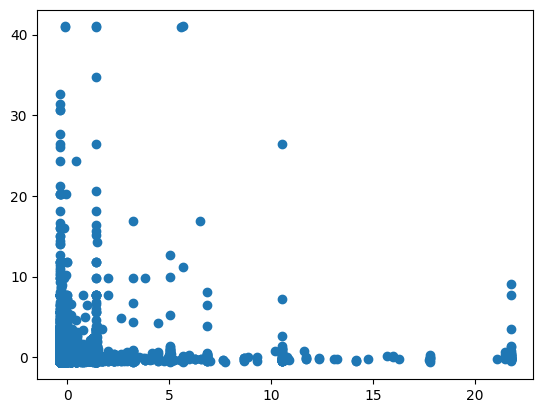

In [47]:

from sklearn.preprocessing import StandardScaler

minimum_nights_scaled = total_data["minimum_nights"]
price_scaled_for_graph = total_data["price"]

scaler_x = StandardScaler()
scaled_minimum_nights = scaler_x.fit_transform(minimum_nights_scaled.values.reshape(-1, 1))

scaler_y = StandardScaler()
scaled_price = scaler_y.fit_transform(price_scaled_for_graph.values.reshape(-1, 1))

plt.scatter(x=scaled_minimum_nights, y=scaled_price)
plt.show()

Continuaremos tomando en cuenta que el limite sera de 11 noches de acuerdo al analisis estadistico, este numero no es una regla, debido a que dependiendo del listing es posible y comun tener listings que se renten por mes, de forma trismestral, semestral e incluso por contrato anual, por lo que se consideraran como outliers solo los listings que superan los 12 meses, y sera desechados.

In [48]:
chlc_desc =total_data.calculated_host_listings_count.describe()

chlc_iqr = chlc_desc["75%"] - chlc_desc["25%"]
upper_limit = chlc_desc["75%"] + 1.5 * chlc_iqr
lower_limit = chlc_desc["25%"] - 1.5 * chlc_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(chlc_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [50]:
total_data[total_data['calculated_host_listings_count']>=4]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,1.0,0.0,0.0,0.0,1.0,0.0
9,40.71344,-73.99037,150,1,160,1.33,4,188,2,0.0,1.0,0.0,0.0,0.0,0.0
21,40.68069,-73.97706,130,2,130,1.09,6,347,1,1.0,0.0,0.0,0.0,1.0,0.0
22,40.67989,-73.97798,80,1,39,0.37,6,364,1,1.0,0.0,0.0,0.0,1.0,0.0
23,40.68001,-73.97865,110,2,71,0.61,6,304,1,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48858,40.74387,-73.82556,68,3,0,NaN,4,362,3,0.0,0.0,1.0,0.0,1.0,0.0
48867,40.59080,-73.97116,25,1,0,NaN,6,338,1,1.0,0.0,0.0,0.0,0.0,1.0
48868,40.59118,-73.97119,25,7,0,NaN,6,365,1,1.0,0.0,0.0,0.0,0.0,1.0
48878,40.74477,-73.87727,45,1,0,NaN,5,172,3,0.0,0.0,1.0,0.0,1.0,0.0


In [56]:
multi_list = total_data[total_data['calculated_host_listings_count']>=4]
per_of_multi = (len(multi_list) / len(total_data)) * 100
print(per_of_multi)


14.484155397802828


Tenemos un limite superior de 3.5 para el numero de listings, pero al pasarlo, tenemos un total de 7080 filas o listings que estan dentro del parametro mayor o igual a 4 listings, este numero indica que el 14.5% por ciento de los listings pertenecen a hosts que poseen 4 o mas airbnb, esto no es inadecuado y en realidad el numero de listings nos sirve mas para analizar el mercado de hosts, ya que esto puede influir en el precio, pero en cuestion de mercado seria rentable reducir el precio a mayor cantidad de propiedades, pues se tendria la ganancia, sin embargo esto depende de muchas variables, como demanda, costos operativos, tipo de propiedad, locacion etc, etc. 
Por esto vamos a hacer un scatter plot para ver la relacion entre precio y numero de listings rapidamente. 

Text(0.7, 0.8, 'Correlation: 0.14')

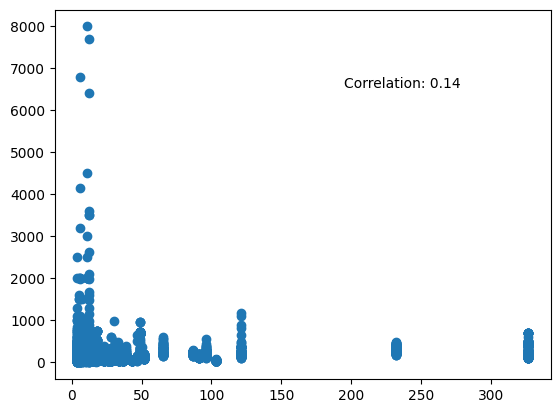

In [65]:

plt.scatter(x=multi_list['calculated_host_listings_count'], y=multi_list['price'])
plt.show
plt.text(0.7, 0.8, f"Correlation: {correlation:.2f}", ha='center', va='center', fontsize=10, transform=plt.gca().transAxes)


Para efectos practicos la correlacion no es la mas alta, pero dentro del data set es considerable, por lo que tenemos la siguiente hipotesis, la primera es que debemos dejar los datos aunque parezcan outliers debido a que estos afectan al mercado y por tanto se deben considerar en el modelo ya que no existe una agrupacion de poblacion que estemos estudiando, si no que estamos hablando de el total de propiedades ofrecidas en airbnb. Podriamos pensar en eliminar estos datos si estuvieramos hablando de predecir los precios para listings de personas en un estatus socioeconomico determinado que no permita tener X cantidad de listings, por otro lado no podemos descartar que una persona o entidad este manejando las propiedades de diferentes personas por lo que estos outliers, si bien son considerables, se define que hacen sentido en el contexto de mercado.

Continuaremos con el analisis de nulos 

In [66]:
total_data.isnull().sum().sort_values(ascending=False)

reviews_per_month                    10044
latitude                                 0
longitude                                0
price                                    0
minimum_nights                           0
number_of_reviews                        0
calculated_host_listings_count           0
availability_365                         0
neighbourhood_group_numeric              0
neighbourhood_group_Brooklyn             0
neighbourhood_group_Manhattan            0
neighbourhood_group_Queens               0
neighbourhood_group_Staten Island        0
room_type_Private room                   0
room_type_Shared room                    0
dtype: int64

Ahora vemos que la unica columna con valores nulos es reviews per month, y esto es debido a que cuando no se tienen reviews o se tienen cero, esta variable arrojara un valor nulo, tenemos 10K filas con este valor, lo cual indica que se tienen cero reviews, en 10K listings, por ello debemos tomar en cuenta que esta variable nos seria util en las siguientes situaciones:
Analisis de actividad en la propiedad por mes, pero para ello necesitariamos saber en que meses se tiene esta actividad y no tenemos estos datos por lo que se descarta. 
Analizando la popularidad de los listings con otras variables para entender como mejorar el servicio de airbnb para futuros clientes, de nuevo no tenemos datos como reviews positivas o negativas y porque, por lo que se descarta.

Por ello lo que haremos es eliminar esta columna ya que es totalmente dependiente de la columna de numero de reviews, solo es otra forma de representar esa variable, por lo que determinamos que en el caso de predecir el precio de los listings, no sera relevante. 

In [70]:
total_data = total_data.drop(columns=['reviews_per_month'], axis=1)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48881 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           48881 non-null  float64
 1   longitude                          48881 non-null  float64
 2   price                              48881 non-null  int64  
 3   minimum_nights                     48881 non-null  int64  
 4   number_of_reviews                  48881 non-null  int64  
 5   calculated_host_listings_count     48881 non-null  int64  
 6   availability_365                   48881 non-null  int64  
 7   neighbourhood_group_numeric        48881 non-null  int8   
 8   neighbourhood_group_Brooklyn       48881 non-null  float64
 9   neighbourhood_group_Manhattan      48881 non-null  float64
 10  neighbourhood_group_Queens         48881 non-null  float64
 11  neighbourhood_group_Staten Island  48881 non-null  float64


In [71]:
total_data.isnull().sum().sort_values(ascending=False)

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_numeric          0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

Con ello ya tenemos un data set libre de valores nulos

In [72]:
neighbourhoods = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
room_types = ['Private room', 'Shared room']

for neighbourhood in neighbourhoods:
    for room_type in room_types:
        col_name = f'neighbourhood_group_{neighbourhood}'
        room_col = f'room_type_{room_type}'
        new_col_name = f'{col_name}_has_{room_col}'

        # Verificar si el room type está en los primeros 4 valores del neighbourhood
        total_data[new_col_name] = total_data.apply(lambda row: row[room_col] == 1 and row[col_name] == 1, axis=1).rolling(window=4).max()
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48881 entries, 0 to 48894
Data columns (total 22 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   latitude                                                      48881 non-null  float64
 1   longitude                                                     48881 non-null  float64
 2   price                                                         48881 non-null  int64  
 3   minimum_nights                                                48881 non-null  int64  
 4   number_of_reviews                                             48881 non-null  int64  
 5   calculated_host_listings_count                                48881 non-null  int64  
 6   availability_365                                              48881 non-null  int64  
 7   neighbourhood_group_numeric                                   48881 non-

In [73]:
total_data.isnull().sum().sort_values(ascending=False)

neighbourhood_group_Staten Island_has_room_type_Shared room     3
neighbourhood_group_Staten Island_has_room_type_Private room    3
neighbourhood_group_Queens_has_room_type_Shared room            3
neighbourhood_group_Queens_has_room_type_Private room           3
neighbourhood_group_Manhattan_has_room_type_Shared room         3
neighbourhood_group_Manhattan_has_room_type_Private room        3
neighbourhood_group_Brooklyn_has_room_type_Shared room          3
neighbourhood_group_Brooklyn_has_room_type_Private room         3
longitude                                                       0
room_type_Shared room                                           0
room_type_Private room                                          0
latitude                                                        0
neighbourhood_group_Queens                                      0
neighbourhood_group_Manhattan                                   0
neighbourhood_group_Brooklyn                                    0
neighbourh

In [74]:
total_data.dropna(axis=0)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn_has_room_type_Private room,neighbourhood_group_Brooklyn_has_room_type_Shared room,neighbourhood_group_Manhattan_has_room_type_Private room,neighbourhood_group_Manhattan_has_room_type_Shared room,neighbourhood_group_Queens_has_room_type_Private room,neighbourhood_group_Queens_has_room_type_Shared room,neighbourhood_group_Staten Island_has_room_type_Private room,neighbourhood_group_Staten Island_has_room_type_Shared room
3,40.68514,-73.95976,89,1,270,1,194,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,40.79851,-73.94399,80,10,9,1,0,2,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,40.74767,-73.97500,200,3,74,1,129,2,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,40.68688,-73.95596,60,45,49,1,0,1,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,40.76489,-73.98493,79,2,430,1,220,2,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,2,9,1,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
48891,40.70184,-73.93317,40,4,0,2,36,1,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
48892,40.81475,-73.94867,115,10,0,1,27,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48893,40.75751,-73.99112,55,1,0,6,2,2,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Agregamos variables que nos dicen que tipo de cuarto se tiene en cada grupo de vencindarios ya que el tipo de cuarto y el vecindario son variables fuertes para la prediccion de precios.

Continuamos con el escalamiento de variables

In [75]:
from sklearn.model_selection import train_test_split

num_variables = [
    'neighbourhood_group_Staten Island_has_room_type_Shared room',
    'neighbourhood_group_Staten Island_has_room_type_Private room',
    'neighbourhood_group_Queens_has_room_type_Shared room',
    'neighbourhood_group_Queens_has_room_type_Private room',
    'neighbourhood_group_Manhattan_has_room_type_Shared room',
    'neighbourhood_group_Manhattan_has_room_type_Private room',
    'neighbourhood_group_Brooklyn_has_room_type_Shared room',
    'neighbourhood_group_Brooklyn_has_room_type_Private room',
    'longitude',
    'room_type_Shared room',
    'room_type_Private room',
    'latitude',
    'neighbourhood_group_Queens',
    'neighbourhood_group_Manhattan',
    'neighbourhood_group_Brooklyn',
    'neighbourhood_group_numeric',
    'availability_365',
    'calculated_host_listings_count',
    'number_of_reviews',
    'minimum_nights',
    'neighbourhood_group_Staten Island'
]
# We divide the dataset into training and test samples
X = total_data.drop("price", axis = 1)[num_variables]
y = total_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()               

,neighbourhood_group_Staten Island_has_room_type_Shared room,neighbourhood_group_Staten Island_has_room_type_Private room,neighbourhood_group_Queens_has_room_type_Shared room,neighbourhood_group_Queens_has_room_type_Private room,neighbourhood_group_Manhattan_has_room_type_Shared room,neighbourhood_group_Manhattan_has_room_type_Private room,neighbourhood_group_Brooklyn_has_room_type_Shared room,neighbourhood_group_Brooklyn_has_room_type_Private room,longitude,room_type_Shared room,...,latitude,neighbourhood_group_Queens,neighbourhood_group_Manhattan,neighbourhood_group_Brooklyn,neighbourhood_group_numeric,availability_365,calculated_host_listings_count,number_of_reviews,minimum_nights,neighbourhood_group_Staten Island
31361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-73.94848,0.0,...,40.80569,0.0,1.0,0.0,2,302,3,38,3,0.0
19903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-73.90729,0.0,...,40.69505,0.0,0.0,1.0,1,0,1,4,4,0.0
25871,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-73.97085,0.0,...,40.75310,0.0,1.0,0.0,2,0,1,33,1,0.0
23358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-73.99568,0.0,...,40.76250,0.0,1.0,0.0,2,0,1,6,2,0.0
17618,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-73.94583,0.0,...,40.82852,0.0,1.0,0.0,2,27,1,9,7,0.0


Normalizamos para hacer el feature scaling

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,neighbourhood_group_Staten Island_has_room_type_Shared room,neighbourhood_group_Staten Island_has_room_type_Private room,neighbourhood_group_Queens_has_room_type_Shared room,neighbourhood_group_Queens_has_room_type_Private room,neighbourhood_group_Manhattan_has_room_type_Shared room,neighbourhood_group_Manhattan_has_room_type_Private room,neighbourhood_group_Brooklyn_has_room_type_Shared room,neighbourhood_group_Brooklyn_has_room_type_Private room,longitude,room_type_Shared room,...,latitude,neighbourhood_group_Queens,neighbourhood_group_Manhattan,neighbourhood_group_Brooklyn,neighbourhood_group_numeric,availability_365,calculated_host_listings_count,number_of_reviews,minimum_nights,neighbourhood_group_Staten Island
31361,-0.027709,-0.121084,-0.126096,-0.554958,-0.192271,-0.977142,-0.178011,-1.187053,0.083566,-0.153747,...,1.410835,-0.358619,1.119283,-0.838532,0.446400,1.438672,-0.127293,0.327710,-0.232320,-0.087483
19903,-0.027709,-0.121084,-0.126096,-0.554958,-0.192271,-0.977142,-0.178011,0.842423,0.979560,-0.153747,...,-0.621178,-0.358619,-0.893429,1.192560,-0.918206,-0.857838,-0.186963,-0.431838,-0.172404,-0.087483
25871,-0.027709,-0.121084,-0.126096,1.801940,-0.192271,1.023393,-0.178011,0.842423,-0.403042,-0.153747,...,0.444968,-0.358619,1.119283,-0.838532,0.446400,-0.857838,-0.186963,0.216011,-0.352153,-0.087483
23358,-0.027709,-0.121084,-0.126096,-0.554958,-0.192271,-0.977142,-0.178011,0.842423,-0.943162,-0.153747,...,0.617608,-0.358619,1.119283,-0.838532,0.446400,-0.857838,-0.186963,-0.387159,-0.292237,-0.087483
17618,-0.027709,-0.121084,-0.126096,-0.554958,-0.192271,1.023393,-0.178011,-1.187053,0.141211,-0.153747,...,1.830131,-0.358619,1.119283,-0.838532,0.446400,-0.652521,-0.186963,-0.320140,0.007346,-0.087483


Utilizamos Select K best para determinar las variables mas utiles para el modelo y simplificar para su entrenamiento posterior.

In [78]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_norm)
X_test_imputed = imputer.transform(X_test_norm)

k = 10
selection_model = SelectKBest(f_classif, k=k)
selection_model.fit(X_train_imputed, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_imputed), columns=X_train_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_imputed), columns=X_test_norm.columns.values[ix])

print(X_train_sel.head())

   neighbourhood_group_Brooklyn_has_room_type_Private room  longitude  \
0                                          -1.187053         0.083566   
1                                           0.842423         0.979560   
2                                           0.842423        -0.403042   
3                                           0.842423        -0.943162   
4                                          -1.187053         0.141211   

   room_type_Shared room  room_type_Private room  neighbourhood_group_Queens  \
0              -0.153747                -0.91539                   -0.358619   
1              -0.153747                 1.09243                   -0.358619   
2              -0.153747                 1.09243                   -0.358619   
3              -0.153747                -0.91539                   -0.358619   
4              -0.153747                -0.91539                   -0.358619   

   neighbourhood_group_Manhattan  neighbourhood_group_Brooklyn  \
0             

In [79]:
X_train_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39104 entries, 0 to 39103
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   neighbourhood_group_Brooklyn_has_room_type_Private room  39104 non-null  float64
 1   longitude                                                39104 non-null  float64
 2   room_type_Shared room                                    39104 non-null  float64
 3   room_type_Private room                                   39104 non-null  float64
 4   neighbourhood_group_Queens                               39104 non-null  float64
 5   neighbourhood_group_Manhattan                            39104 non-null  float64
 6   neighbourhood_group_Brooklyn                             39104 non-null  float64
 7   availability_365                                         39104 non-null  float64
 8   calculated_host_listings_c

Finalmente, obtenemos los datos que se ven arriba para entrenar a nuestro modelo :)

los guardamos en processed

In [81]:
X_train_sel['price'] = list(y_train)
X_test_sel["price"] = list(y_test)



In [84]:
X_test_sel.to_csv("/workspaces/EDA-first/data/processed/X_test_sel.csv", index=False)
X_train_sel.to_csv("/workspaces/EDA-first/data/processed/X_train_sel.csv", index=False)